In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
import seaborn as sns
from sklearn import preprocessing
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [4]:
pd.set_option("display.max_rows", 1000)
import warnings

warnings.filterwarnings("ignore")

Model AR jedna zmienna

In [5]:
path = r"C:\Users\natal\Desktop\Studia\Studia magisterskie\Praca magisterska\Dane walmart 2\train.csv"
path2 = r'C:\Users\natal\Desktop\Studia\Studia magisterskie\Praca magisterska\Dane - ceny domów\raw_sales.csv\raw_sales.csv'

def import_data_with_one_feature(path):
    data_train = pd.read_csv(path)
    data_train_clean = data_train[["Store", "Date", "Weekly_Sales"]]
    data_train_ready = data_train_clean.groupby(["Date"], as_index=False).sum()
    data_train_ready = data_train_ready[["Date", "Weekly_Sales"]]
    return data_train_ready

In [73]:
def import_data(path2):
    data = pd.read_csv(path2)
    data['datesold'] = pd.to_datetime(data['datesold'])
    data.drop_duplicates(subset = ['datesold'], inplace = True)
    # sns.boxplot(data['price'])
    data = data[data['price'] <= 2000000]
    # data['price'] = data['price'].astype('float64')
    data = data.sort_values(by = ['datesold'])
    return data

data2_many_features = import_data(path2)
data2_one_feature = data2_many_features[['datesold', 'price']]
data2_many_features = data2_many_features.reset_index(drop=True)
data2_many_features
# data2_one_feature

datesold  postcode   price propertyType  bedrooms
0    2007-02-07      2607  525000        house         4
1    2007-02-27      2906  290000        house         3
2    2007-03-07      2905  328000        house         3
3    2007-03-09      2905  380000        house         4
4    2007-03-21      2906  310000        house         3
...         ...       ...     ...          ...       ...
3574 2019-07-23      2914  425000        house         4
3575 2019-07-24      2906  475000        house         3
3576 2019-07-25      2913  421000        house         2
3577 2019-07-26      2615  470000        house         3
3578 2019-07-27      2905  610000        house         4

[3579 rows x 5 columns]

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data2_many_features[['propertyType']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns = encoder.get_feature_names_out(['propertyType']))
data2_many_features = pd.concat([data2_many_features, one_hot_df], axis = 1)
data2_many_features = data2_many_features.drop(['propertyType'], axis = 1)
data2_many_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3579 entries, 0 to 3578
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datesold            3579 non-null   datetime64[ns]
 1   postcode            3579 non-null   int64         
 2   price               3579 non-null   int64         
 3   bedrooms            3579 non-null   int64         
 4   propertyType_house  3579 non-null   float64       
 5   propertyType_unit   3579 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 167.9 KB


In [48]:
data_train_ready_one_feature = import_data_with_one_feature(path)
data_train_ready_one_feature

Date  Weekly_Sales
0    2010-02-05   49750740.50
1    2010-02-12   48336677.63
2    2010-02-19   48276993.78
3    2010-02-26   43968571.13
4    2010-03-05   46871470.30
5    2010-03-12   45925396.51
6    2010-03-19   44988974.64
7    2010-03-26   44133961.05
8    2010-04-02   50423831.26
9    2010-04-09   47365290.44
10   2010-04-16   45183667.08
11   2010-04-23   44734452.56
12   2010-04-30   43705126.71
13   2010-05-07   48503243.52
14   2010-05-14   45330080.20
15   2010-05-21   45120108.06
16   2010-05-28   47757502.56
17   2010-06-04   50188543.12
18   2010-06-11   47826546.72
19   2010-06-18   47622046.23
20   2010-06-25   46609036.29
21   2010-07-02   48917484.50
22   2010-07-09   47899529.37
23   2010-07-16   46243899.58
24   2010-07-23   44888849.11
25   2010-07-30   44630363.42
26   2010-08-06   48204999.12
27   2010-08-13   46464418.41
28   2010-08-20   47060952.92
29   2010-08-27   45909740.44
30   2010-09-03   47194257.61
31   2010-09-10   45634397.84
32   2010-09-17   43080726.51
33   2010-09-24   41358514.41
34   2010-10-01   42239875.87
35   2010-10-08   45102974.23
36   2010-10-15   43149473.45
37   2010-10-22   43066669.52
38   2010-10-29   43602830.95
39   2010-11-05   45781981.89
40   2010-11-12   46124800.83
41   2010-11-19   45125584.18
42   2010-11-26   65821003.24
43   2010-12-03   49909027.88
44   2010-12-10   55666770.39
45   2010-12-17   61820799.85
46   2010-12-24   80931415.60
47   2010-12-31   40432519.00
48   2011-01-07   42775787.77
49   2011-01-14   40673678.04
50   2011-01-21   40654648.03
51   2011-01-28   39599852.99
52   2011-02-04   46153111.12
53   2011-02-11   47336192.79
54   2011-02-18   48716164.12
55   2011-02-25   44125859.84
56   2011-03-04   46980603.74
57   2011-03-11   44627319.40
58   2011-03-18   44872325.97
59   2011-03-25   42876199.18
60   2011-04-01   43458991.19
61   2011-04-08   45887466.80
62   2011-04-15   44973328.14
63   2011-04-22   48676692.06
64   2011-04-29   43530032.78
65   2011-05-06   46861958.29
66   2011-05-13   45446144.82
67   2011-05-20   44046598.01
68   2011-05-27   45293457.04
69   2011-06-03   48771994.18
70   2011-06-10   47669734.66
71   2011-06-17   47447561.77
72   2011-06-24   45884094.58
73   2011-07-01   47578519.50
74   2011-07-08   47859263.78
75   2011-07-15   45515929.92
76   2011-07-22   45274411.39
77   2011-07-29   43683274.28
78   2011-08-05   48015466.97
79   2011-08-12   46249569.21
80   2011-08-19   46917347.62
81   2011-08-26   47416948.45
82   2011-09-02   45376623.27
83   2011-09-09   46763227.53
84   2011-09-16   43793960.08
85   2011-09-23   42718096.73
86   2011-09-30   42195830.81
87   2011-10-07   47211688.36
88   2011-10-14   44374820.30
89   2011-10-21   45818953.44
90   2011-10-28   45855821.05
91   2011-11-04   48655544.30
92   2011-11-11   48474224.75
93   2011-11-18   46438980.56
94   2011-11-25   66593605.26
95   2011-12-02   49390556.49
96   2011-12-09   55561147.70
97   2011-12-16   60085695.94
98   2011-12-23   76998241.31
99   2011-12-30   46042461.04
100  2012-01-06   44955421.95
101  2012-01-13   42023078.48
102  2012-01-20   42080996.56
103  2012-01-27   39834974.67
104  2012-02-03   46085608.09
105  2012-02-10   50009407.92
106  2012-02-17   50197056.96
107  2012-02-24   45771506.57
108  2012-03-02   46861034.97
109  2012-03-09   47480454.11
110  2012-03-16   46901504.94
111  2012-03-23   44993794.45
112  2012-03-30   45272862.02
113  2012-04-06   53502315.87
114  2012-04-13   46629261.41
115  2012-04-20   45072529.78
116  2012-04-27   43716798.89
117  2012-05-04   47124197.93
118  2012-05-11   46925878.99
119  2012-05-18   46823939.22
120  2012-05-25   47892463.31
121  2012-06-01   48281649.72
122  2012-06-08   49651171.78
123  2012-06-15   48412110.70
124  2012-06-22   47668284.97
125  2012-06-29   46597112.12
126  2012-07-06   51253021.88
127  2012-07-13   46099732.10
128  2012-07-20   46059543.45
129  2012-07-27   44097154.97
130  2012-08-03   47485899.56
131  2012-08-10   47403451.04
132  2012-08-17   473

In [49]:
def display_time_series(data):
    sns.lineplot(x=data["Date"], y=data["Weekly_Sales"], marker="o")
    plt.tight_layout()
    plt.show()

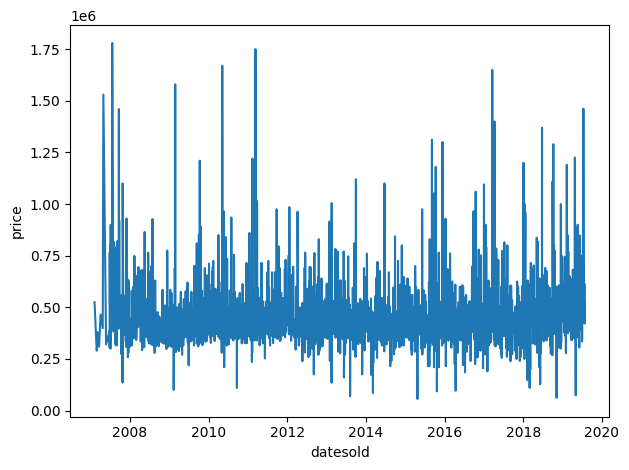

In [50]:
def display_time_series2(data2_one_feature):    
    sns.lineplot(x=data2_one_feature['datesold'], y=data2_one_feature['price'])
    plt.tight_layout()
    plt.show()
display_time_series2(data2_one_feature)

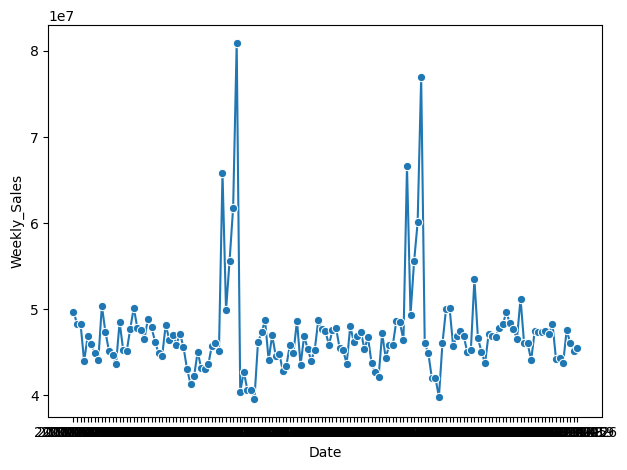

In [51]:
display_time_series(data_train_ready_one_feature)


In [52]:
df_stationarityTest = adfuller(
    data_train_ready_one_feature["Weekly_Sales"], autolag="AIC"
)
print("P-value: ", df_stationarityTest[1])
# szereg jest stacjonarny bo mniejsze od 0,05

P-value:  2.675979158986027e-07


In [82]:
def adfuller_test(series, signif=0.05):
    x = adfuller(series, autolag='AIC')
    output = {'Test Statistic': x[0], 
              'P-value': x[1], 
              'Number of lags': x[2], 
              'Number of observations': x[3],
              f'Reject (signif. level {signif})': x[1] < signif }
    for key, val in x[4].items():
         output[f'Critical value {key}'] = val
    return pd.Series(output)

data2_many_features.apply(lambda x: adfuller_test(x), axis=0)

datesold   postcode     price  bedrooms  \
Test Statistic               7.155583 -40.978972 -6.442474 -8.330953   
P-value                           1.0        0.0       0.0       0.0   
Number of lags                     29          1        29        24   
Number of observations           3549       3577      3549      3554   
Reject (signif. level 0.05)     False       True      True      True   
Critical value 1%           -3.432194  -3.432179 -3.432194 -3.432191   
Critical value 5%           -2.862355  -2.862348 -2.862355 -2.862354   
Critical value 10%          -2.567204    -2.5672 -2.567204 -2.567203   

                            propertyType_house propertyType_unit  
Test Statistic                      -11.065531        -11.065531  
P-value                                    0.0               0.0  
Number of lags                              20                20  
Number of observations                    3558              3558  
Reject (signif. level 0.05)               True              True  
Critical value 1%                    -3.432189         -3.432189  
Critical value 5%                    -2.862353         -2.862353  
Critical value 10%                   -2.567203         -2.567203

In [53]:
df_stationarityTest = adfuller(
    data2_one_feature["price"], autolag="AIC"
)
print("P-value: ", df_stationarityTest[1])
# szereg jest stacjonarny bo mniejsze od 0,05

P-value:  1.5955017554582688e-08


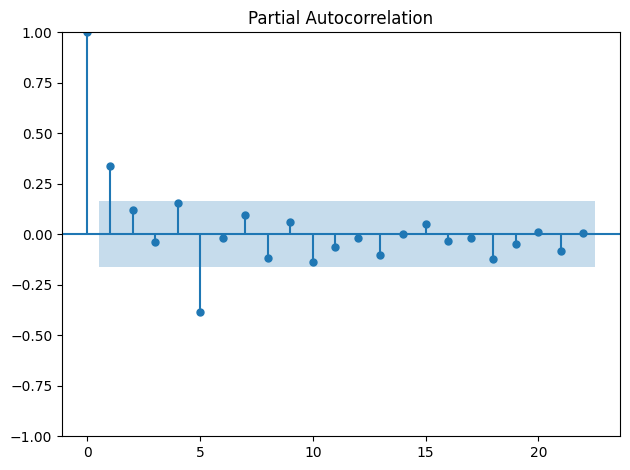

In [54]:
# wykres pacf - funkcja autokorelacji cząstkowej
plot_pacf(data_train_ready_one_feature["Weekly_Sales"])
plt.tight_layout()
# lags=5

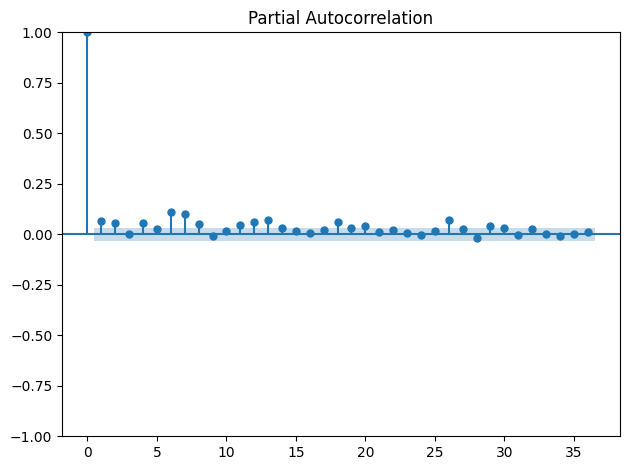

In [55]:
# wykres pacf - funkcja autokorelacji cząstkowej
plot_pacf(data2_one_feature["price"])
plt.tight_layout()
# lags=14

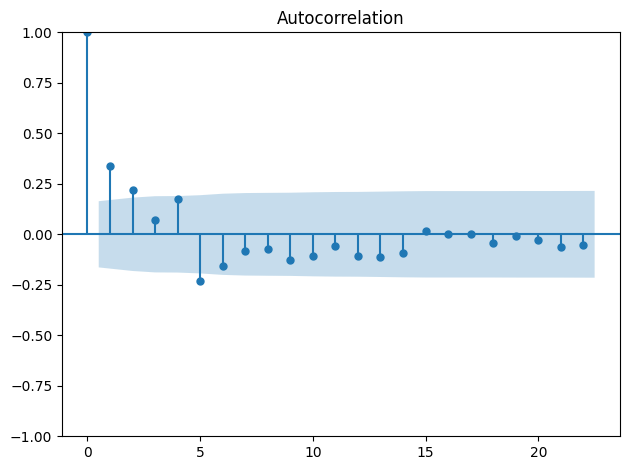

In [56]:
plot_acf(data_train_ready_one_feature["Weekly_Sales"])
plt.tight_layout()
# odpowiedni może być model ma

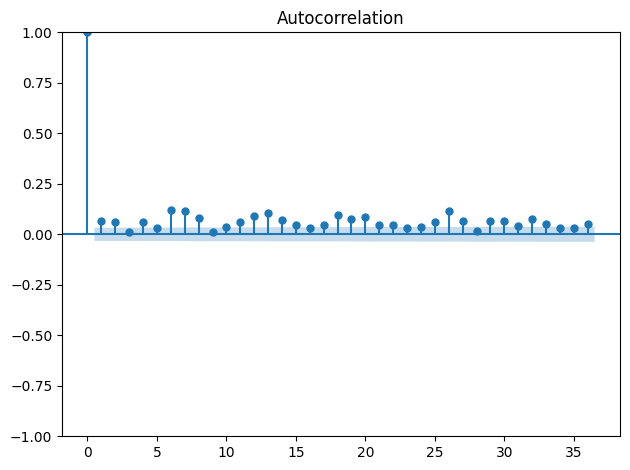

In [57]:
plot_acf(data2_one_feature["price"])
plt.tight_layout()

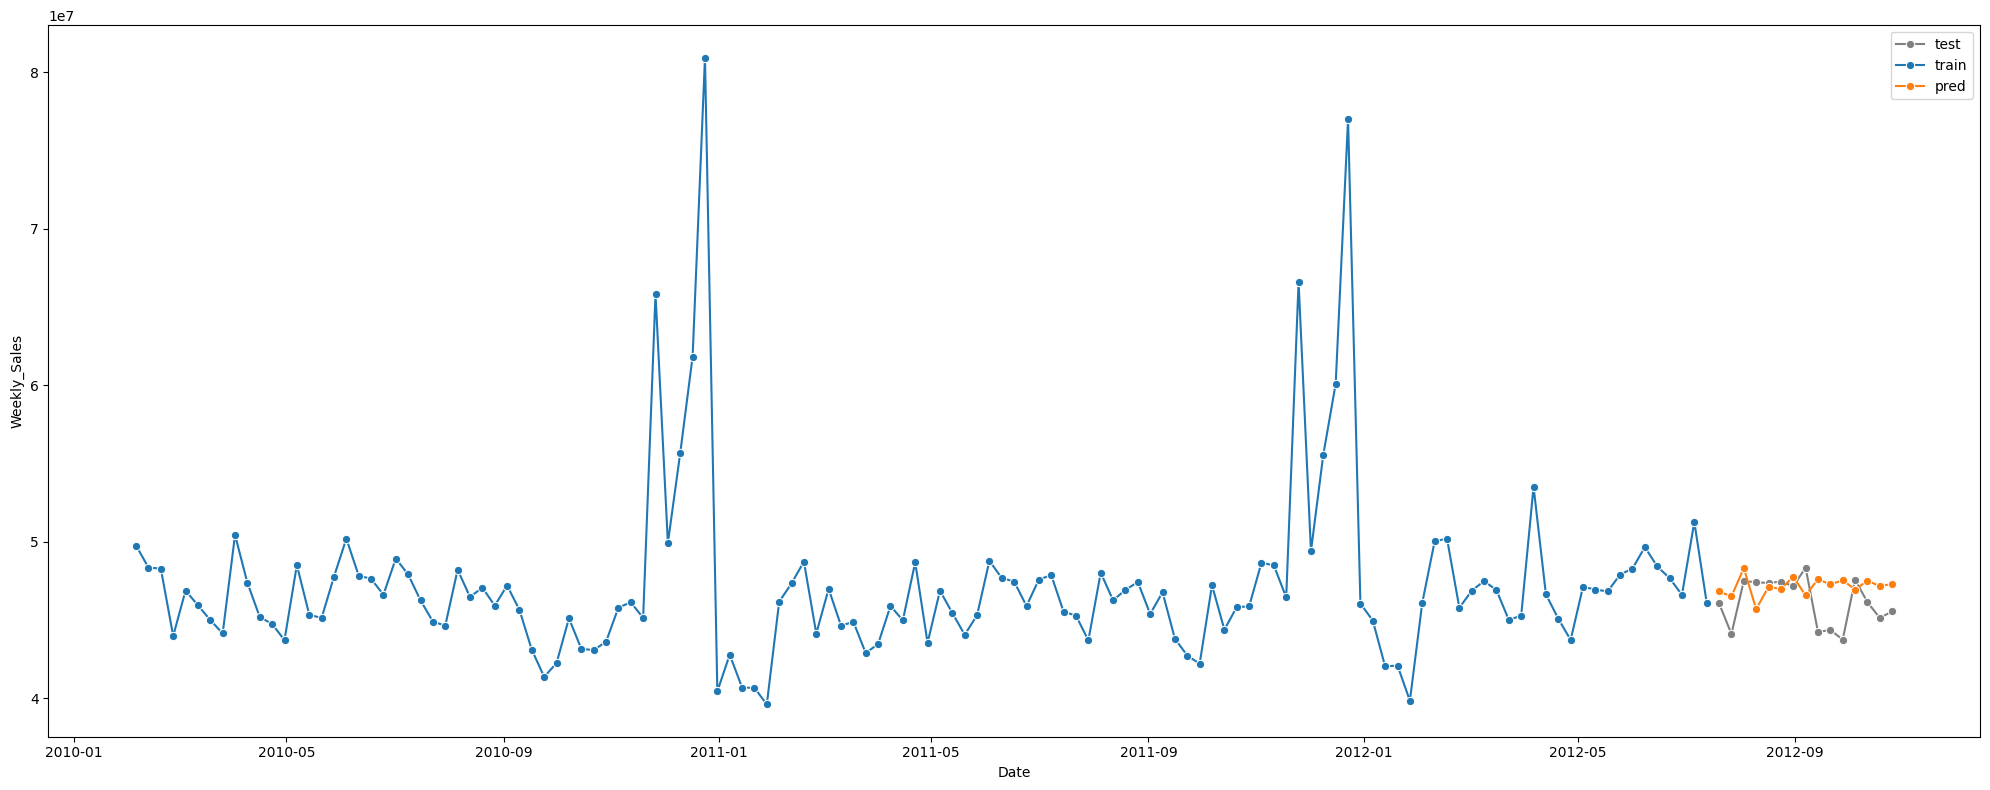

In [63]:
def AR_model(data, output, lags):
    train_len = int(0.9 * len(data))
    train = output[:train_len]
    ar_model = AutoReg(train, lags=lags).fit()
    # print(ar_model.summary())
    pred = ar_model.predict(start=train_len, end=len(data), dynamic=False)
    pred = pred.reset_index(drop = True)
    return pred, train_len

def plot_predict(data, train_len, pred, output, input):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
    sns.lineplot(
        x=input[train_len : len(data)],
        y=output[train_len : len(data)],
        marker = 'o',
        label="test",
        color="grey",
    )
    sns.lineplot(
        x=input[:train_len],
        y=output[:train_len],
        marker = 'o',
        label="train",
    )
    sns.lineplot(x=input[train_len : len(data)].reset_index(drop=True), y=pred, marker = 'o', label="pred")
    plt.tight_layout()
    plt.show()

prediction_AR, train_len = AR_model(data_train_ready_one_feature, data_train_ready_one_feature.Weekly_Sales, 5)
plot_predict(data_train_ready_one_feature, train_len, prediction_AR, data_train_ready_one_feature.Weekly_Sales, 
             data_train_ready_one_feature.Date)


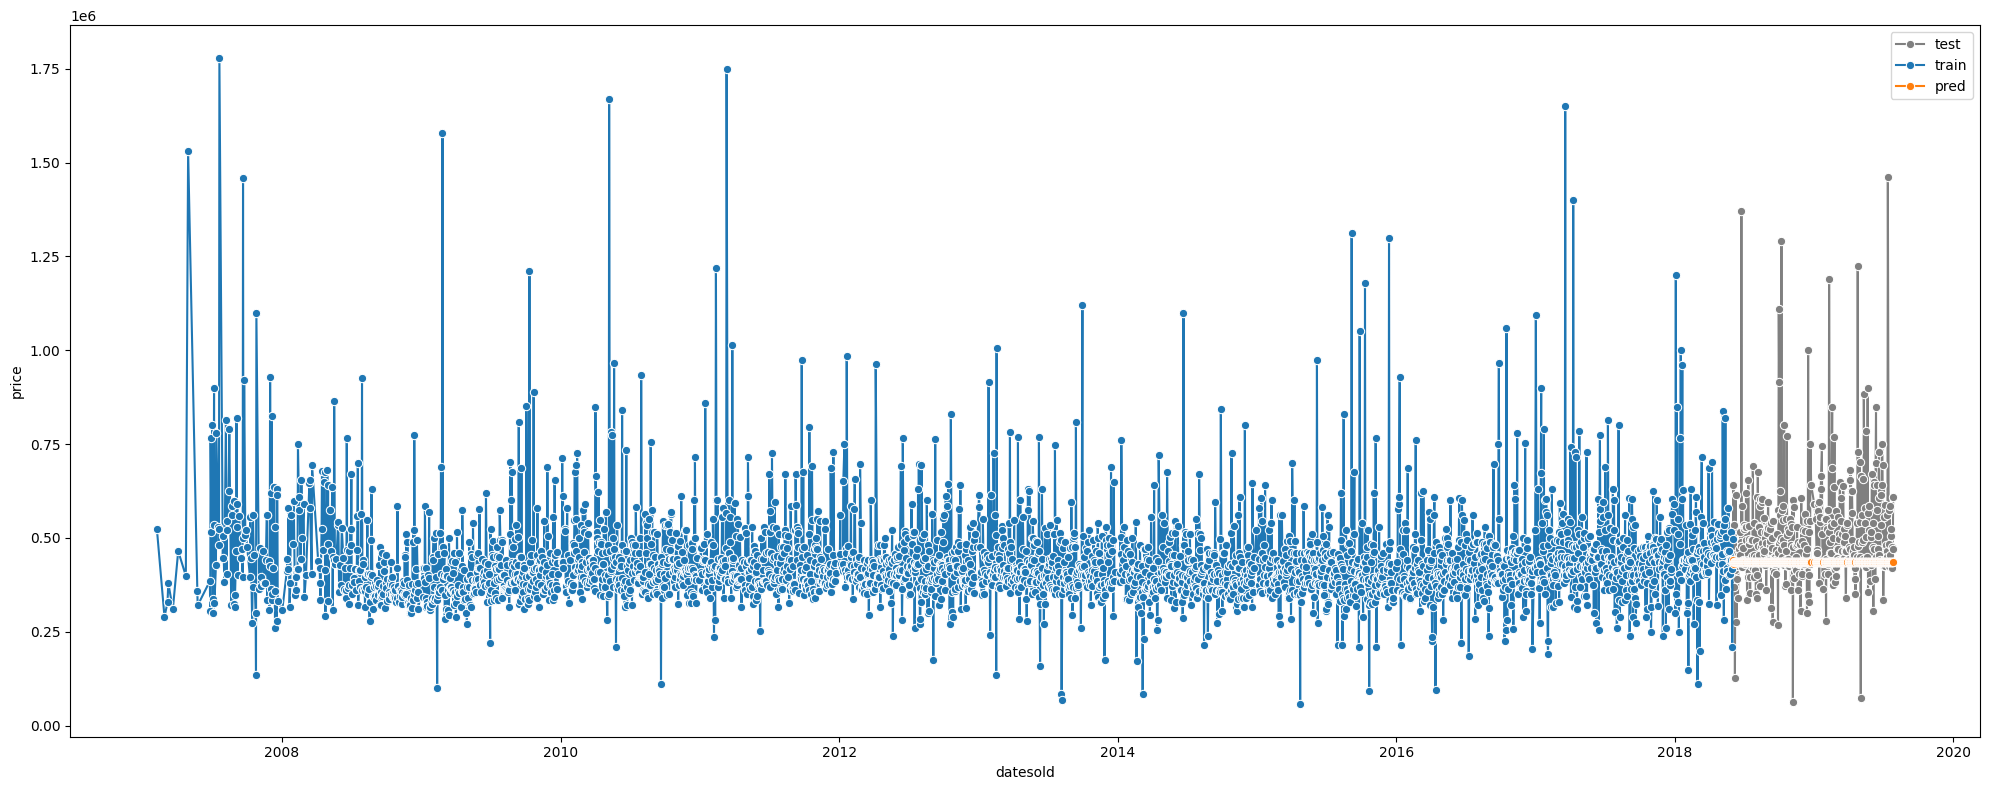

In [64]:
prediction_AR_2, train_len_2 = AR_model(data2_one_feature, data2_one_feature.price, 5)
plot_predict(data2_one_feature, train_len_2, prediction_AR_2, data2_one_feature.price, data2_one_feature.datesold)

Model VAR wiele zmiennych

In [65]:
def import_data_with_many_features(path):
    data_train = pd.read_csv(path)
    label_encoder = preprocessing.LabelEncoder()
    data_train["IsHoliday"] = label_encoder.fit_transform(data_train["IsHoliday"])
    data_train_clean = data_train[["Store", "Date", "Weekly_Sales", "IsHoliday"]]
    data_train_ready = data_train_clean.groupby(
        ["Date", "Store", "IsHoliday"], as_index=False
    ).sum()
    data_train_ready
    return data_train_ready

In [66]:
data_train_ready_many_features = import_data_with_many_features(path)
data_train_ready_many_features

Date  Store  IsHoliday  Weekly_Sales
0     2010-02-05      1          0    1643690.90
1     2010-02-05      2          0    2136989.46
2     2010-02-05      3          0     461622.22
3     2010-02-05      4          0    2135143.87
4     2010-02-05      5          0     317173.10
...          ...    ...        ...           ...
6430  2012-10-26     41          0    1316542.59
6431  2012-10-26     42          0     514756.08
6432  2012-10-26     43          0     587603.55
6433  2012-10-26     44          0     361067.07
6434  2012-10-26     45          0     760281.43

[6435 rows x 4 columns]

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, May, 2024
Time:                     18:20:46
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    19.0453
Nobs:                     5758.00    HQIC:                   18.8192
Log likelihood:          -78043.5    FPE:                1.32018e+08
AIC:                      18.6984    Det(Omega_mle):     1.25371e+08
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         33.677616         0.745690           45.163           0.000
L1.y1          0.545553         0.012447           43.829           0.000
L1.y2          0.845333         0.403055            2.097           0.036
L1.y3         -0.

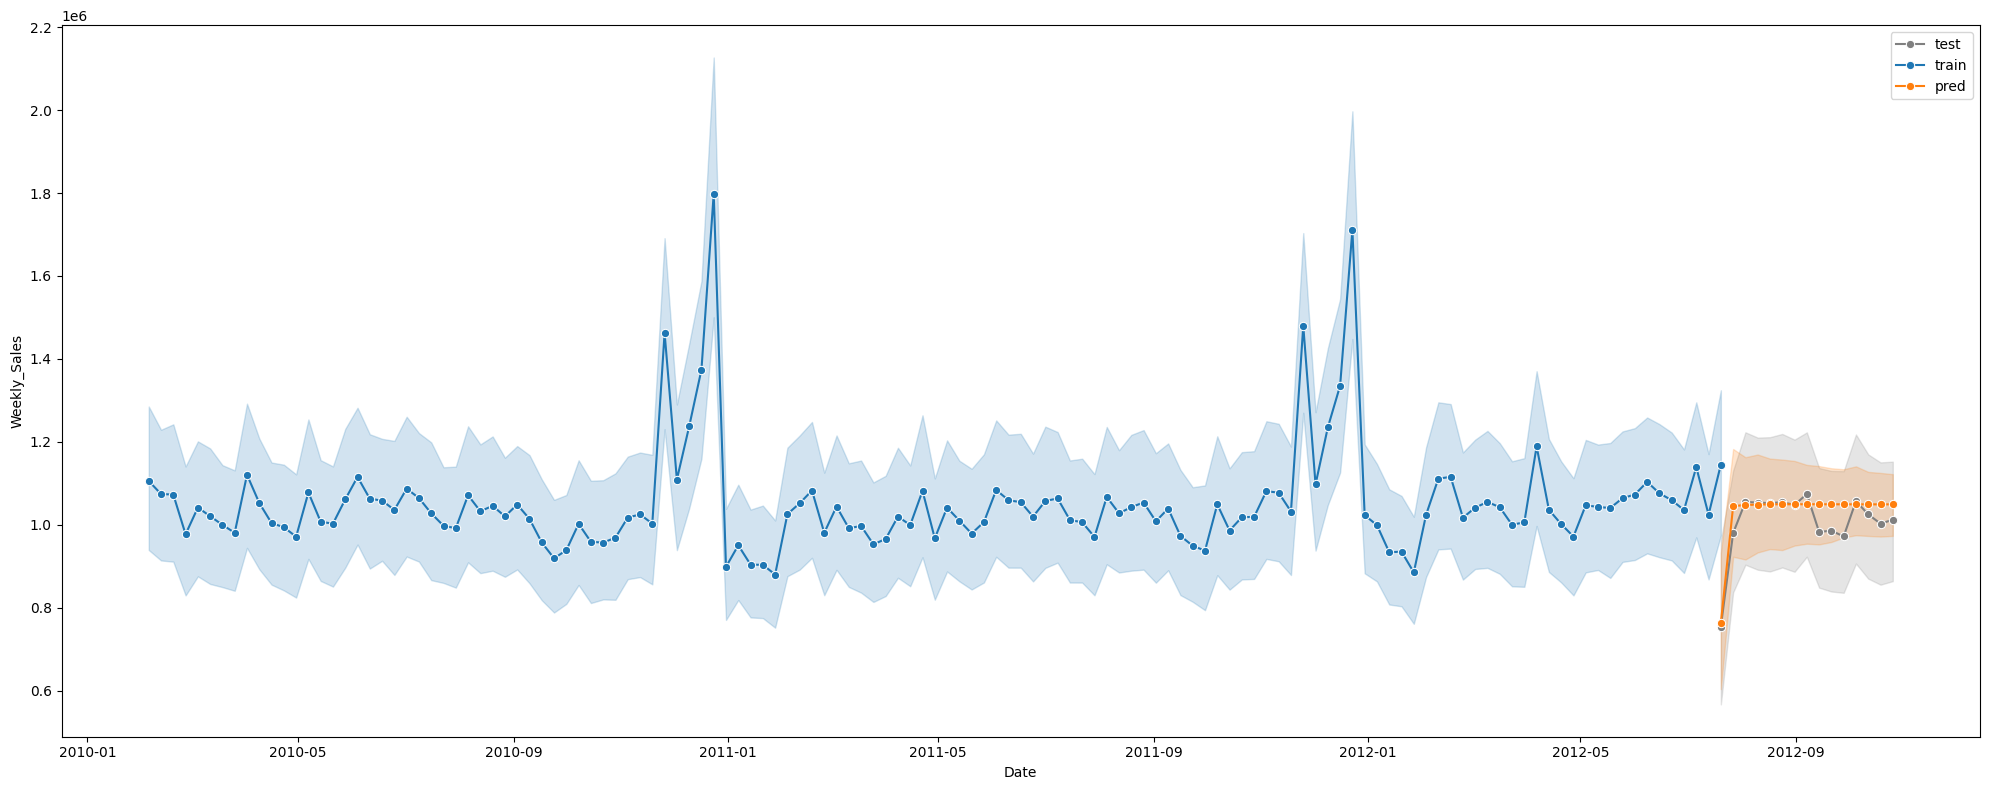

In [107]:
#dobrze pokazuje się na wykresie gdy się puści wcześniej dane do ml dla one i many
def VAR_method(data, name):
    train_len = int(0.9 * len(data))
    train = data[: int(0.9 * (len(data)))]
    test = data[int(0.9 * (len(data))) :]
    train.index = train[name]
    train = train.drop([name], axis=1)
    test.index = test[name]
    test = test.drop([name], axis=1)
    var_model = VAR(np.asarray(train))
    optimal_lags = var_model.select_order()
    lag_order = optimal_lags.selected_orders["bic"]
    results = var_model.fit(lag_order)
    forecast_input = train.values[-lag_order:]
    print(results.summary())
    pred = results.forecast(forecast_input, steps=len(test))
    pred = pred[:, 2]
    return pred, train_len


predictions_VAR, train_len = VAR_method(data_train_ready_many_features, 'Date')
# plot_predict(data_train_ready_many_features, train_len, predictions_VAR)
plot_predict(data_train_ready_many_features, train_len, predictions_VAR, data_train_ready_many_features.Weekly_Sales,
             data_train_ready_many_features.Date)

In [108]:
predictions_VAR_2, train_len_2 = VAR_method(data2_many_features, 'datesold')

plot_predict(data2_many_features, train_len_2, predictions_VAR_2, data2_many_features.price, data2_many_features.datesold)

LinAlgError: 5-th leading minor of the array is not positive definite

MA model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -2151.878
Date:                Sun, 12 May 2024   AIC                           4317.756
Time:                        18:19:14   BIC                           4337.721
Sample:                             0   HQIC                          4325.868
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.723e+07   6.65e-09   7.11e+15      0.000    4.72e+07    4.72e+07
ma.L1          0.3969      0.074      5.370      0.000       0.252       0.542
ma.L2          0.2872      0.086      3.325      0.0

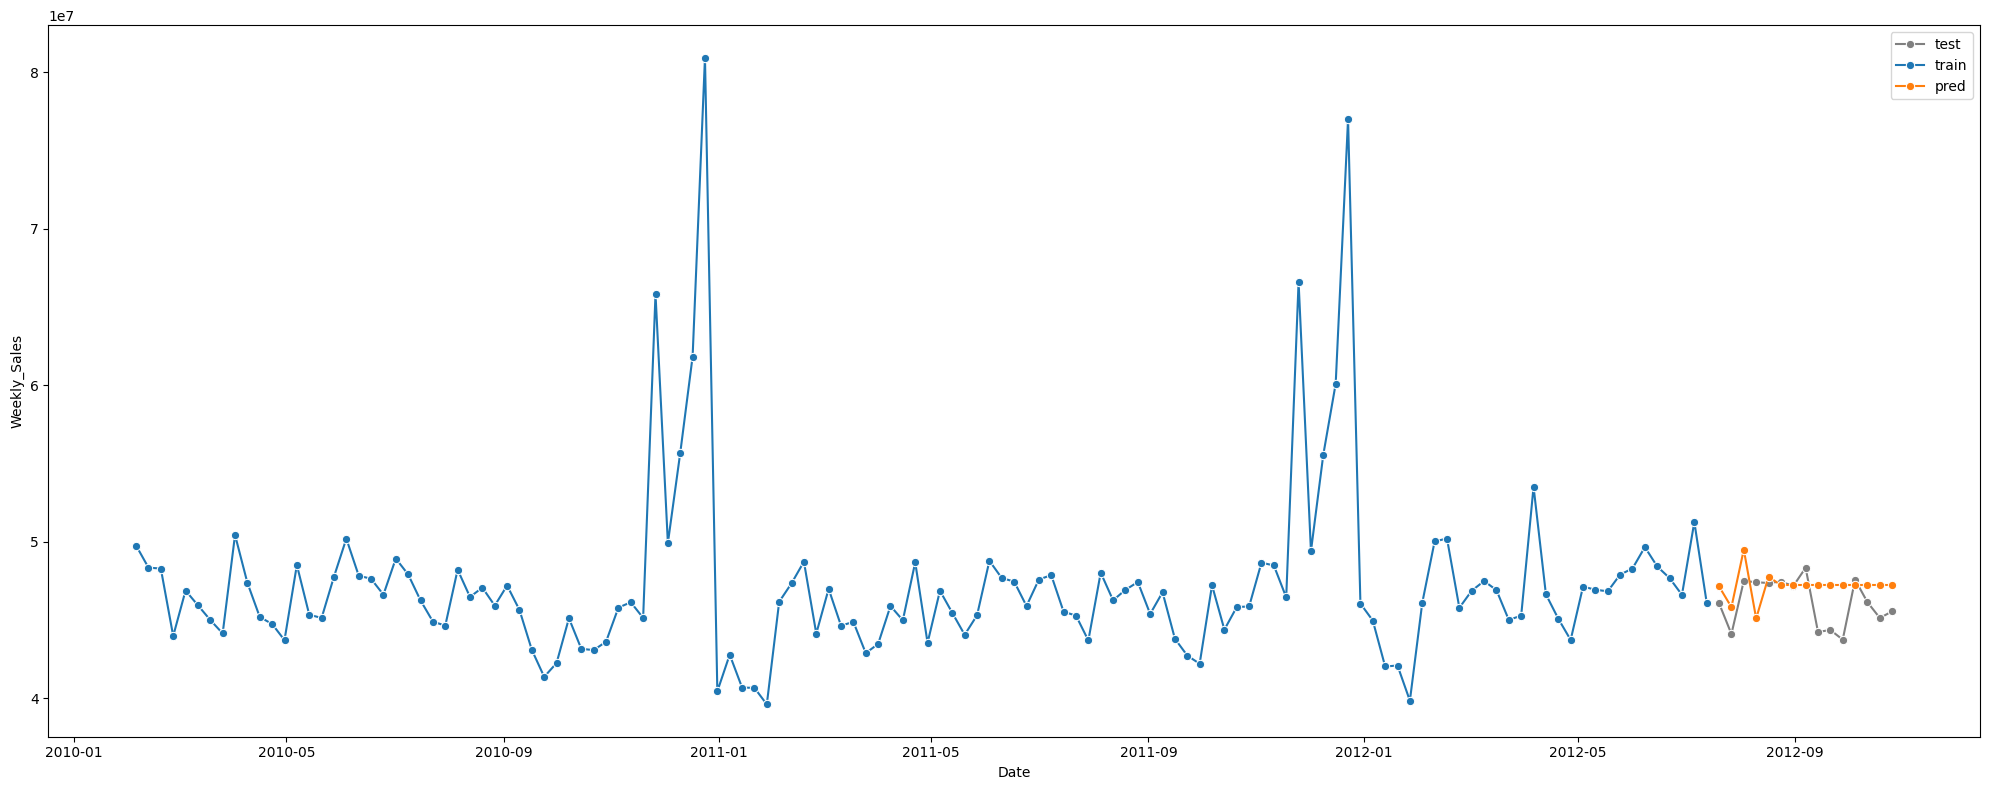

In [105]:
def MA_method(data, name):
    train_len = int(0.9 * len(data))
    train = data[: int(0.9 * (len(data)))]
    test = data[int(0.9 * (len(data))) :]
    train.index = train[name]
    train = train.drop([name], axis=1)
    test.index = test[name]
    test = test.drop([name], axis=1)
    model = ARIMA(np.asarray(train), order=(0, 0, 5))
    model_fit = model.fit()
    print(model_fit.summary())
    pred_ma = model_fit.get_forecast(steps=len(test))
    pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
    pred = pred_ma_series.values
    return pred, train_len


pred_MA, train_len = MA_method(data_train_ready_one_feature, 'Date')
plot_predict(data_train_ready_one_feature, train_len, pred_MA, data_train_ready_one_feature.Weekly_Sales, 
             data_train_ready_one_feature.Date)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3221
Model:                 ARIMA(0, 0, 5)   Log Likelihood              -42362.608
Date:                Sun, 12 May 2024   AIC                          84739.217
Time:                        18:19:45   BIC                          84781.759
Sample:                             0   HQIC                         84754.464
                               - 3221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.36e+05   2310.452    188.701      0.000    4.31e+05    4.41e+05
ma.L1          0.0340      0.020      1.742      0.082      -0.004       0.072
ma.L2          0.0280      0.017      1.665      0.0

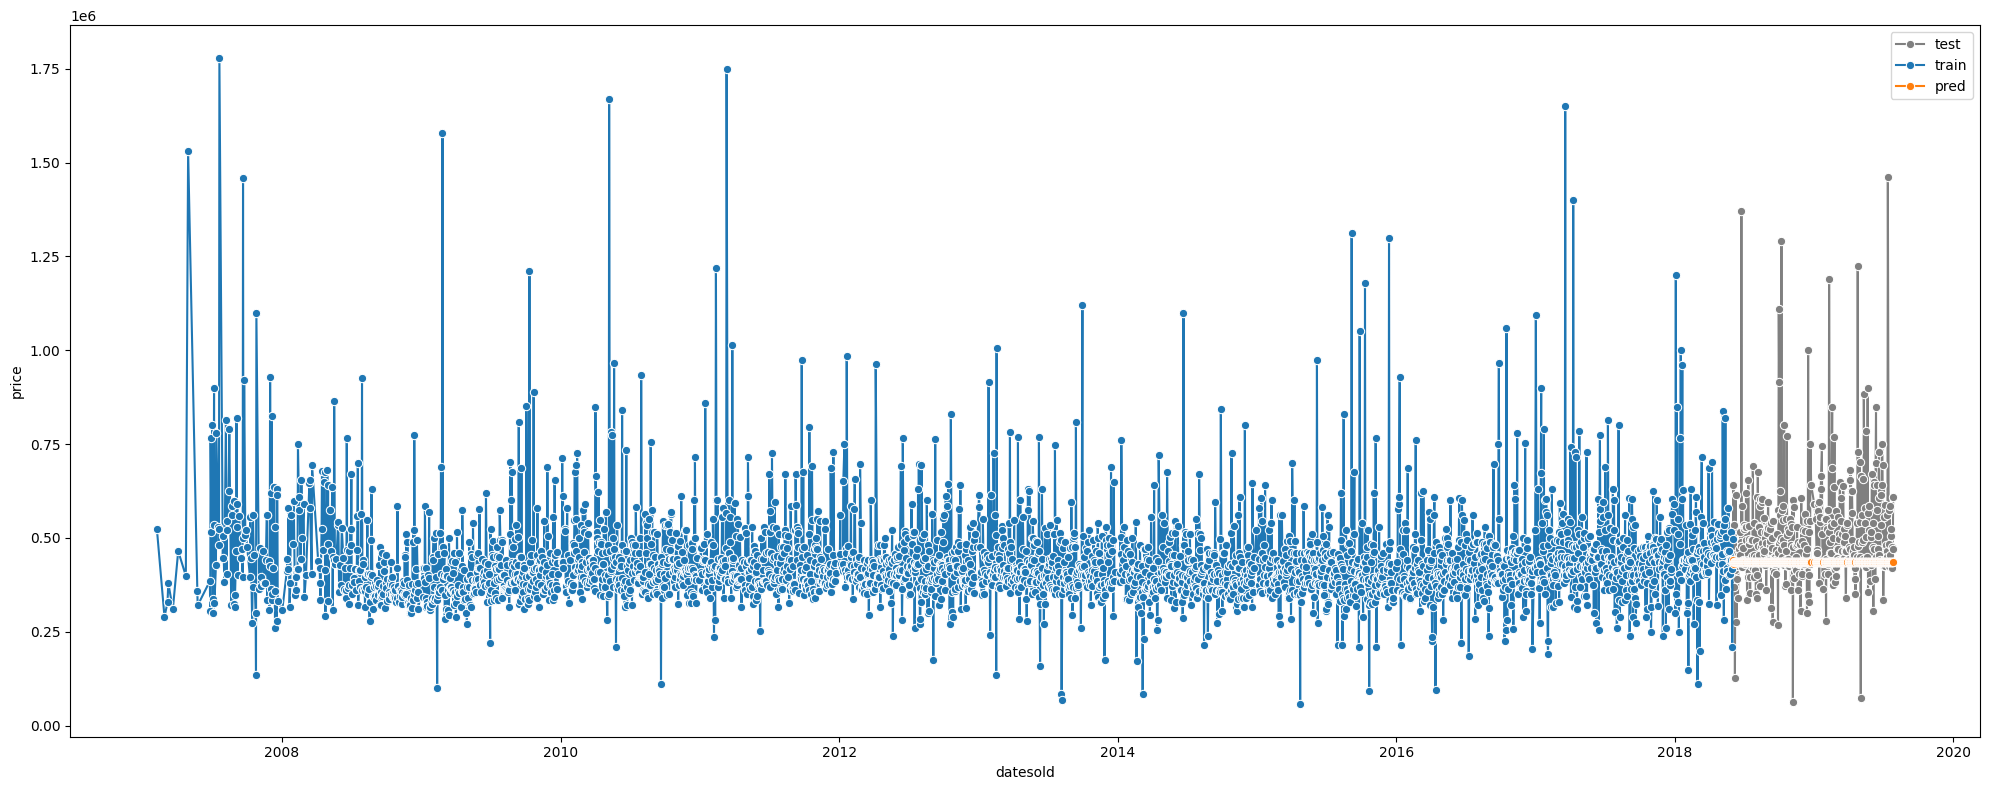

In [106]:
pred_MA_2, train_len_2 = MA_method(data2_one_feature, 'datesold')
plot_predict(data2_one_feature, train_len_2, pred_MA_2, data2_one_feature.price, 
             data2_one_feature.datesold)

ARMA model


In [110]:
def data_ARMA(data, name):
    train_len = int(0.9 * len(data))
    train = data[: int(0.9 * (len(data)))]
    test = data[int(0.9 * (len(data))) :]
    train.index = train[name]
    train = train.drop([name], axis=1)
    test.index = test[name]
    test = test.drop([name], axis=1)
    return train, test, train_len


train_ARMA, test_ARMA, train_len = data_ARMA(data_train_ready_one_feature, 'Date')
train_ARMA_2, test_ARMA_2, train_len_2 = data_ARMA(data2_one_feature, 'datesold')

In [112]:
def find_ARIMA_parameters(train):
    p_params = range(0, 25, 2)
    q_params = range(0, 7, 1)
    # Create dictionary to store MAEs
    mae_grid = dict()
    # Outer loop: Iterate through possible values for `p`
    for p in p_params:
        # Create key-value pair in dict. Key is `p`, value is empty list.
        mae_grid[p] = list()
        # Inner loop: Iterate through possible values for `q`
        for q in q_params:
            # Combination of hyperparameters for model
            order = (p, 0, q)
            # Train model
            model = ARIMA(train, order=order).fit()
            # Generate in-sample (training) predictions
            y_pred = model.predict()
            # Calculate training MAE
            mae = mean_absolute_error(train, y_pred)
            # Append MAE to list in dictionary
            mae_grid[p].append(mae)
        # print(f"Trained ARIMA {order} with mae {mae}")
    # print(mae_grid)
    mae_df = pd.DataFrame(mae_grid)
    print(mae_df)
    # mae_df.round(4)


find_ARIMA_parameters(train_ARMA)
find_ARIMA_parameters(train_ARMA_2)

             0             2             4             6             8   \
0  3.117981e+06  2.968612e+06  2.962795e+06  2.959770e+06  2.989173e+06   
1  2.996547e+06  2.904068e+06  2.913525e+06  2.967052e+06  2.985005e+06   
2  2.960804e+06  3.040046e+06  3.022685e+06  2.976594e+06  3.057376e+06   
3  3.058882e+06  3.095814e+06  3.017812e+06  3.169406e+06  3.026243e+06   
4  2.985679e+06  2.938582e+06  2.904379e+06  3.139514e+06  2.906708e+06   
5  2.942595e+06  3.081946e+06  3.077555e+06  3.068713e+06  3.049453e+06   
6  2.925863e+06  3.091795e+06  3.085280e+06  3.049753e+06  3.008941e+06   

             10            12            14            16            18  \
0  2.993132e+06  2.985178e+06  3.012469e+06  2.996708e+06  2.993052e+06   
1  3.074052e+06  2.983702e+06  3.000092e+06  2.995564e+06  2.972311e+06   
2  3.070876e+06  3.076889e+06  3.010952e+06  3.069102e+06  2.971270e+06   
3  3.020158e+06  3.020147e+06  3.024987e+06  2.964537e+06  3.090677e+06   
4  3.024003e+06  3.00811

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model:                ARIMA(16, 0, 4)   Log Likelihood               -2146.800
Date:                Sun, 12 May 2024   AIC                           4337.600
Time:                        19:10:01   BIC                           4400.345
Sample:                             0   HQIC                          4363.094
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.723e+07   5.46e-08   8.65e+14      0.000    4.72e+07    4.72e+07
ar.L1         -0.0923      0.199     -0.465      0.642      -0.481       0.297
ar.L2         -0.1278      0.198     -0.644      0.5

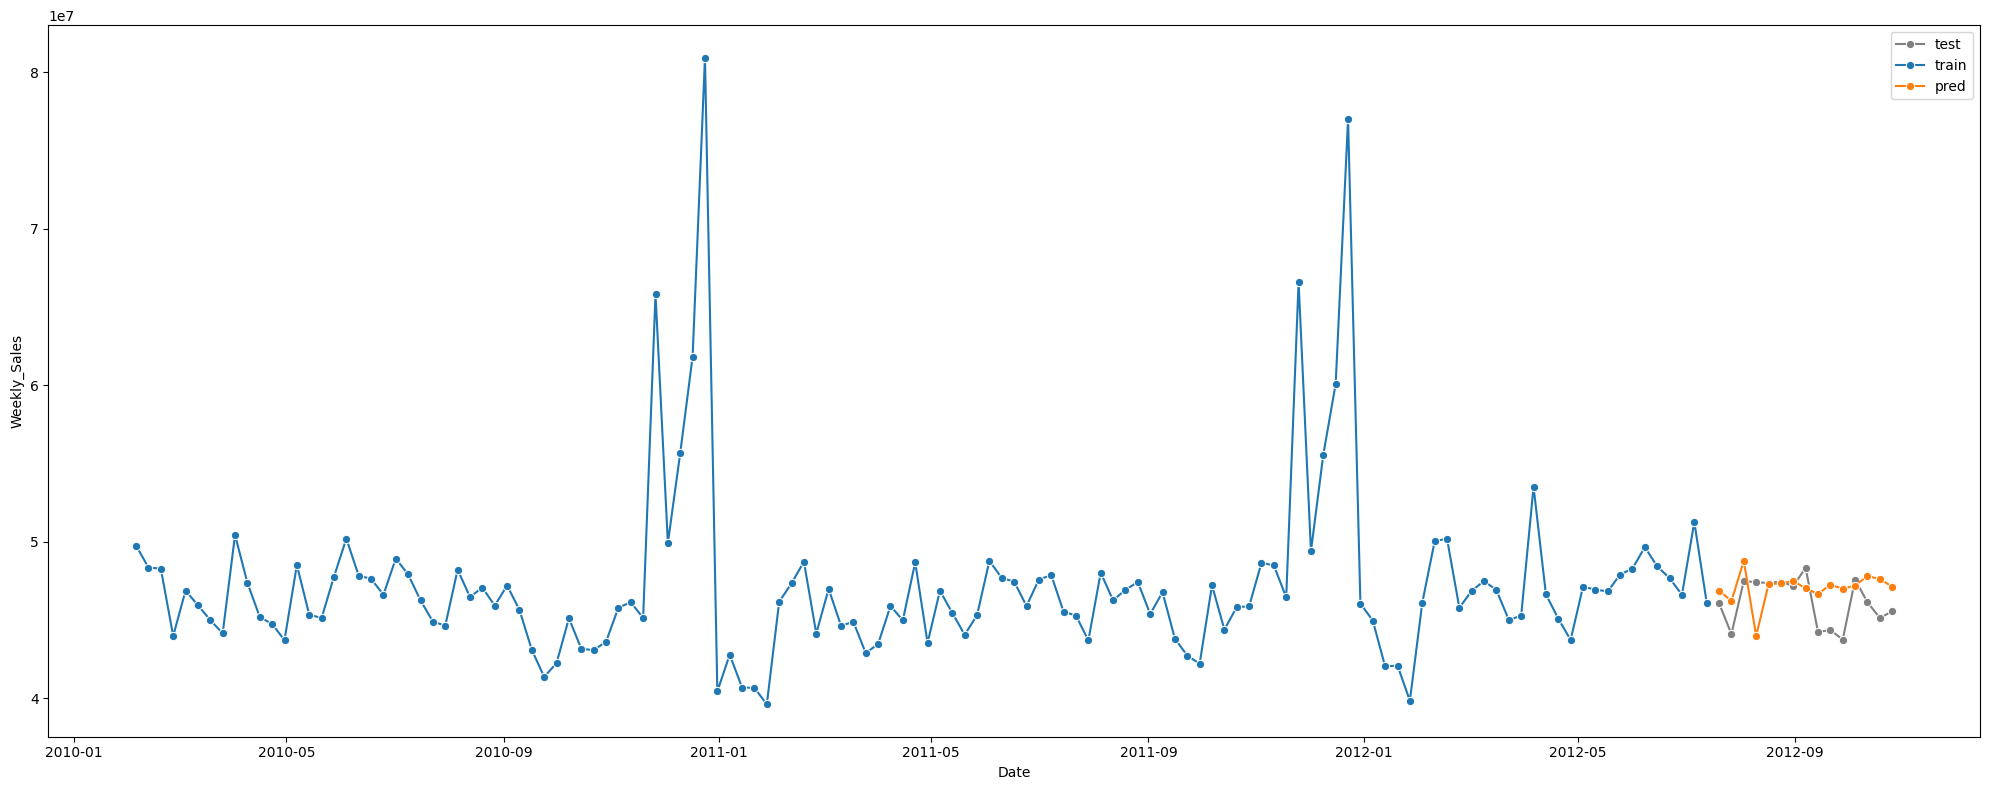

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3221
Model:                 ARIMA(4, 0, 5)   Log Likelihood              -42306.369
Date:                Sun, 12 May 2024   AIC                          84634.738
Time:                        19:10:11   BIC                          84701.590
Sample:                             0   HQIC                         84658.698
                               - 3221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.36e+05   8057.595     54.109      0.000     4.2e+05    4.52e+05
ar.L1          1.2082      0.179      6.761      0.000       0.858       1.559
ar.L2         -0.2393      0.365     -0.656      0.5

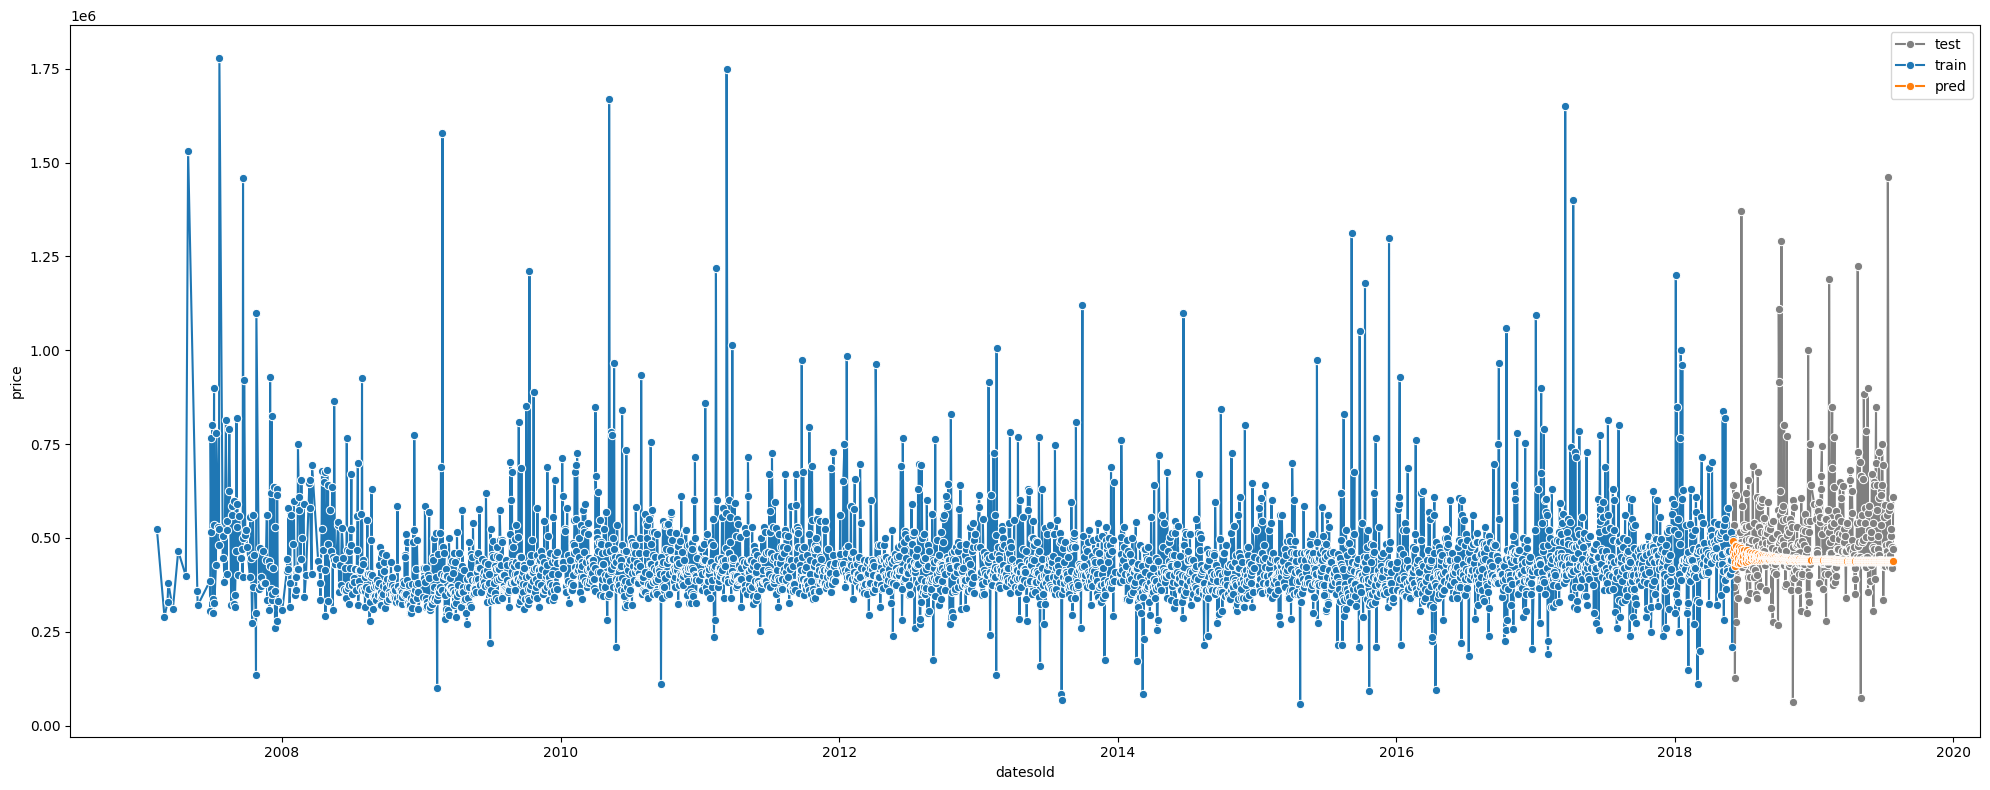

In [113]:
def ARMA_method(train, test, order):
    model = ARIMA(np.asarray(train), order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    pred_ma = model_fit.get_forecast(steps=len(test))
    pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
    pred = pred_ma_series.values
    return pred


prediction_ARMA = ARMA_method(train_ARMA, test_ARMA, (16,0,4))
plot_predict(data_train_ready_one_feature, train_len, prediction_ARMA, data_train_ready_one_feature.Weekly_Sales, 
             data_train_ready_one_feature.Date)

prediction_ARMA_2 = ARMA_method(train_ARMA_2, test_ARMA_2, (4,0,5))
plot_predict(data2_one_feature, train_len_2, prediction_ARMA_2, data2_one_feature.price, 
             data2_one_feature.datesold)

ARIMA model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model:                ARIMA(16, 0, 4)   Log Likelihood               -2146.800
Date:                Sun, 12 May 2024   AIC                           4337.600
Time:                        19:16:19   BIC                           4400.345
Sample:                             0   HQIC                          4363.094
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.723e+07   5.46e-08   8.65e+14      0.000    4.72e+07    4.72e+07
ar.L1         -0.0923      0.199     -0.465      0.642      -0.481       0.297
ar.L2         -0.1278      0.198     -0.644      0.5

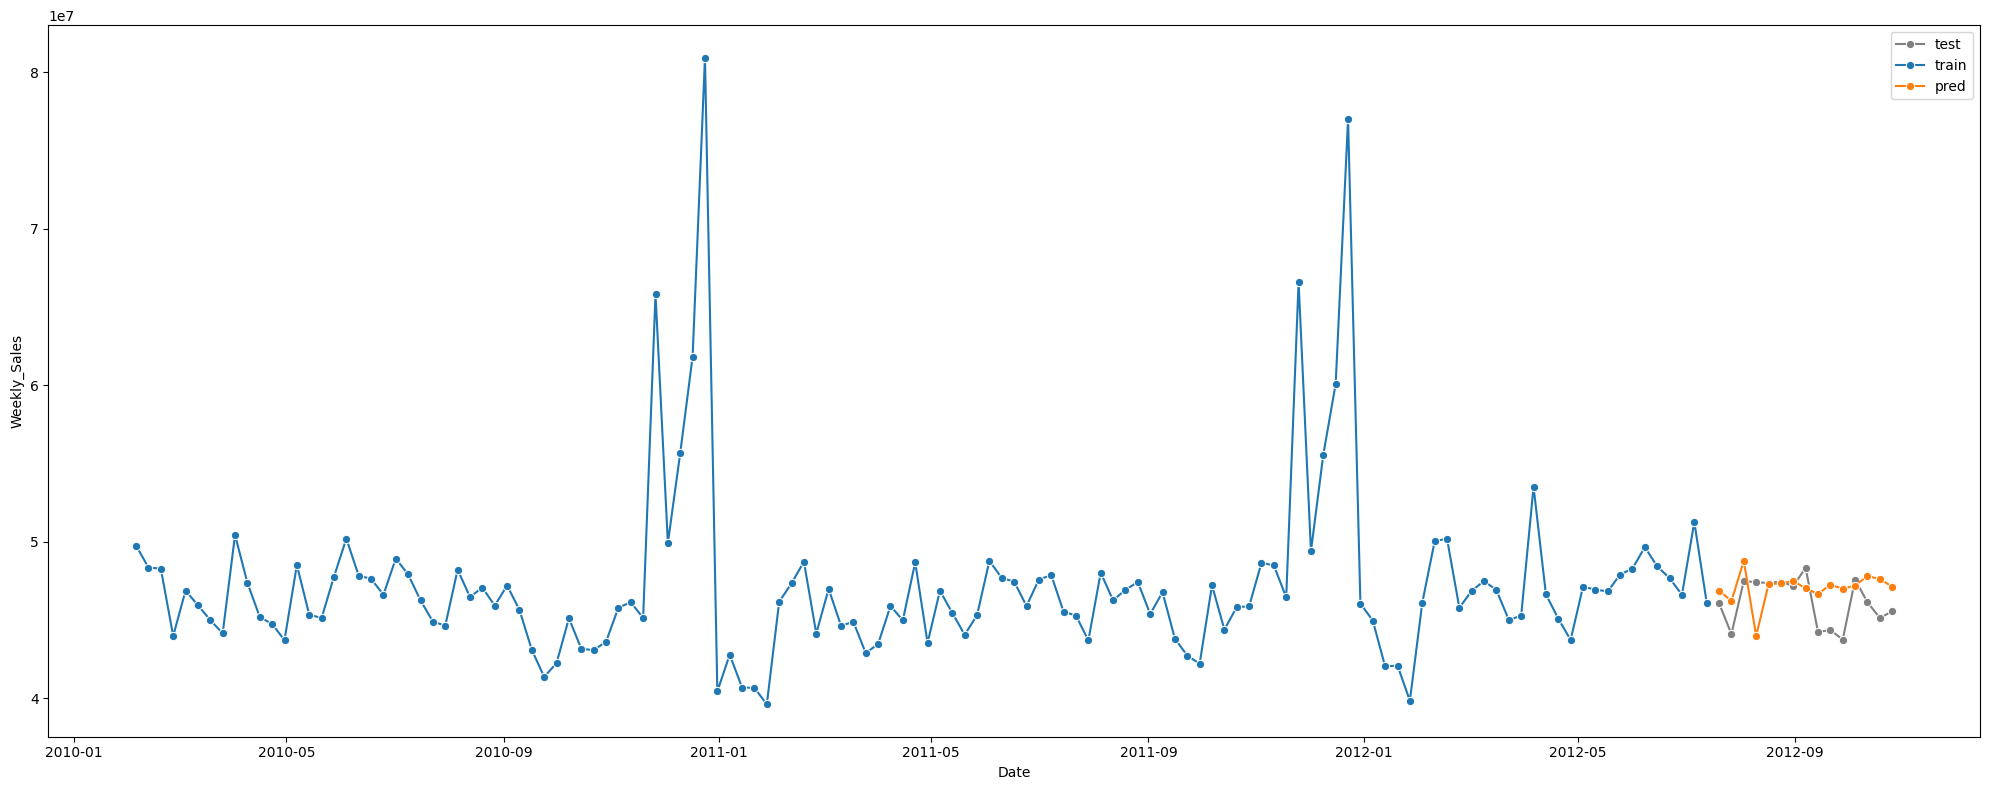

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3221
Model:                 ARIMA(4, 0, 5)   Log Likelihood              -42306.369
Date:                Sun, 12 May 2024   AIC                          84634.738
Time:                        19:16:29   BIC                          84701.590
Sample:                             0   HQIC                         84658.698
                               - 3221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.36e+05   8057.595     54.109      0.000     4.2e+05    4.52e+05
ar.L1          1.2082      0.179      6.761      0.000       0.858       1.559
ar.L2         -0.2393      0.365     -0.656      0.5

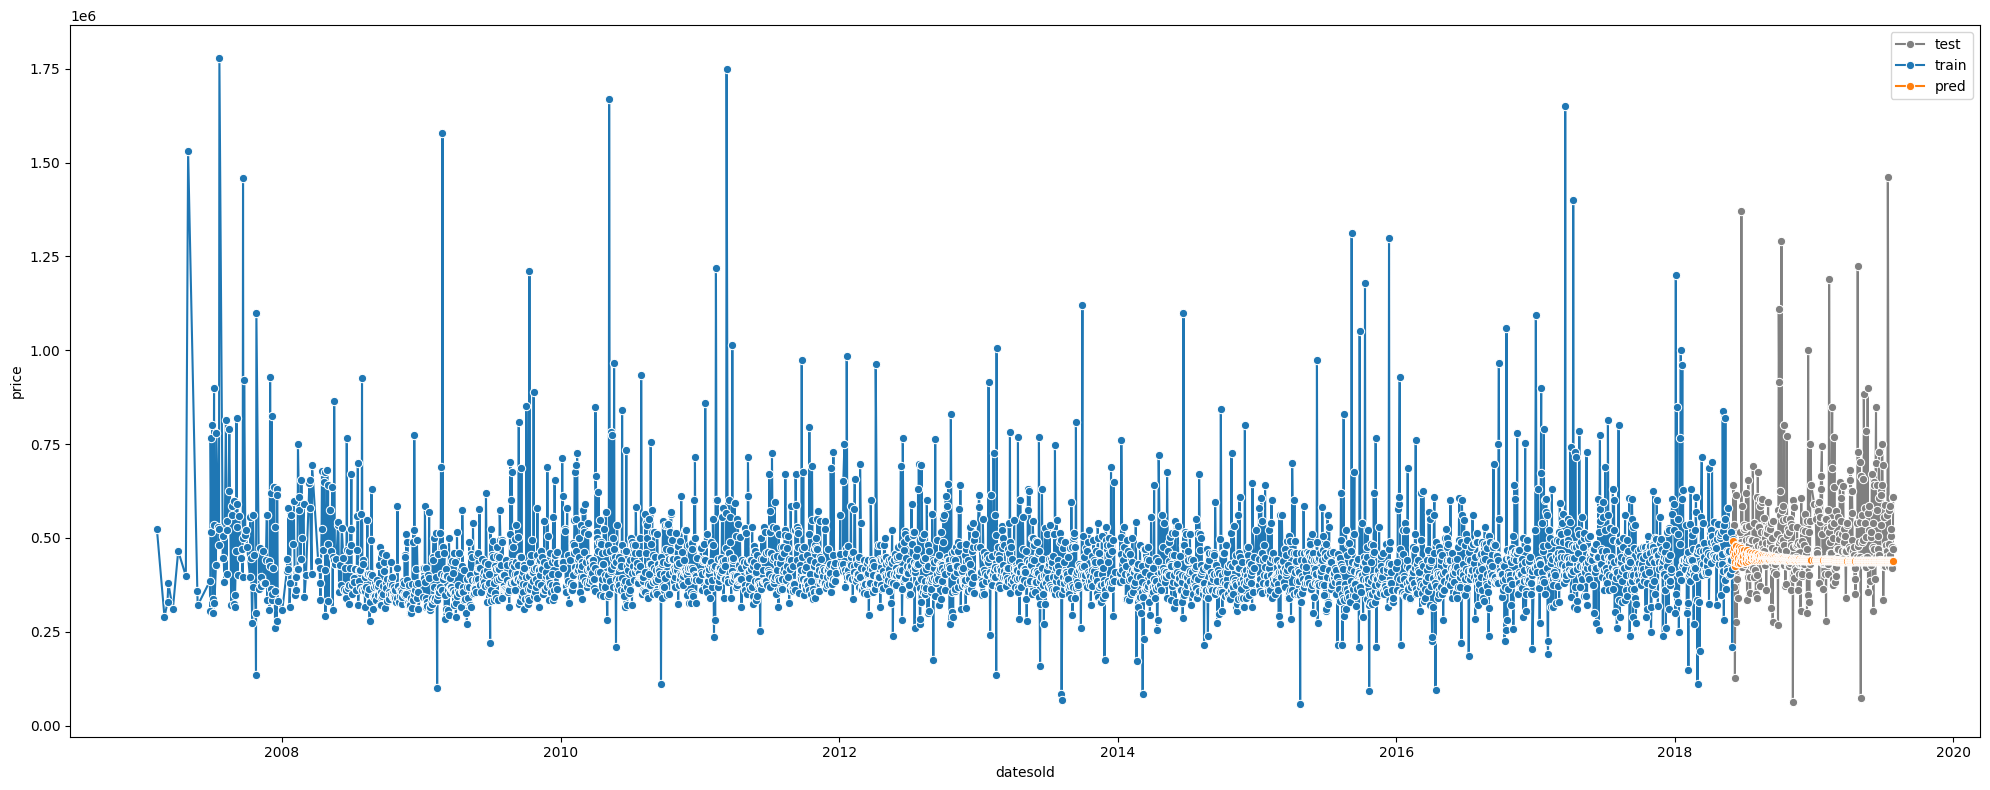

In [115]:
# parametry modelu arima są bez zmian ponieważ szereg jest stacjonarny
def ARIMA_method(train, test, order):
    model = ARIMA(np.asarray(train), order=order)
    model_fit = model.fit()
    print(model_fit.summary())
    pred_ma = model_fit.get_forecast(steps=len(test))
    pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
    pred = pred_ma_series.values
    return pred


prediction_ARIMA = ARIMA_method(train_ARMA, test_ARMA, (16,0,4))
plot_predict(data_train_ready_one_feature, train_len, prediction_ARIMA, data_train_ready_one_feature.Weekly_Sales, 
             data_train_ready_one_feature.Date)

prediction_ARIMA_2 = ARIMA_method(train_ARMA_2, test_ARMA_2, (4,0,5))
plot_predict(data2_one_feature, train_len_2, prediction_ARIMA_2, data2_one_feature.price, 
             data2_one_feature.datesold)

SARIMA model

In [116]:
import pmdarima as pmd
def auto_arima_method(data):
    model = pmd.auto_arima(
        np.asarray(data),
        start_p=1,
        start_q=1,
        test="adf",
        m=12,
        seasonal=True,
        trace=True,
    )
    print(model)

auto_arima_method(train_ARMA)    
auto_arima_method(train_ARMA_2)   

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=5.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4349.620, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4338.038, Time=1.81 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4342.211, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4890.748, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4336.369, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=4337.870, Time=0.53 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=5.98 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=4336.483, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=4337.556, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4340.944, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=4338.466, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 15.033 seconds
 ARIMA(1,0,0)(0,0,0)[1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2193.048
Date:                Sun, 12 May 2024   AIC                           4390.096
Time:                        19:22:07   BIC                           4395.800
Sample:                             0   HQIC                          4392.413
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9905      0.009    113.359      0.000       0.973       1.008
sigma2       4.32e+13   2.47e-17   1.75e+30      0.000    4.32e+13    4.32e+13
Ljung-Box (L1) (Q):                  22.13   Jarque-

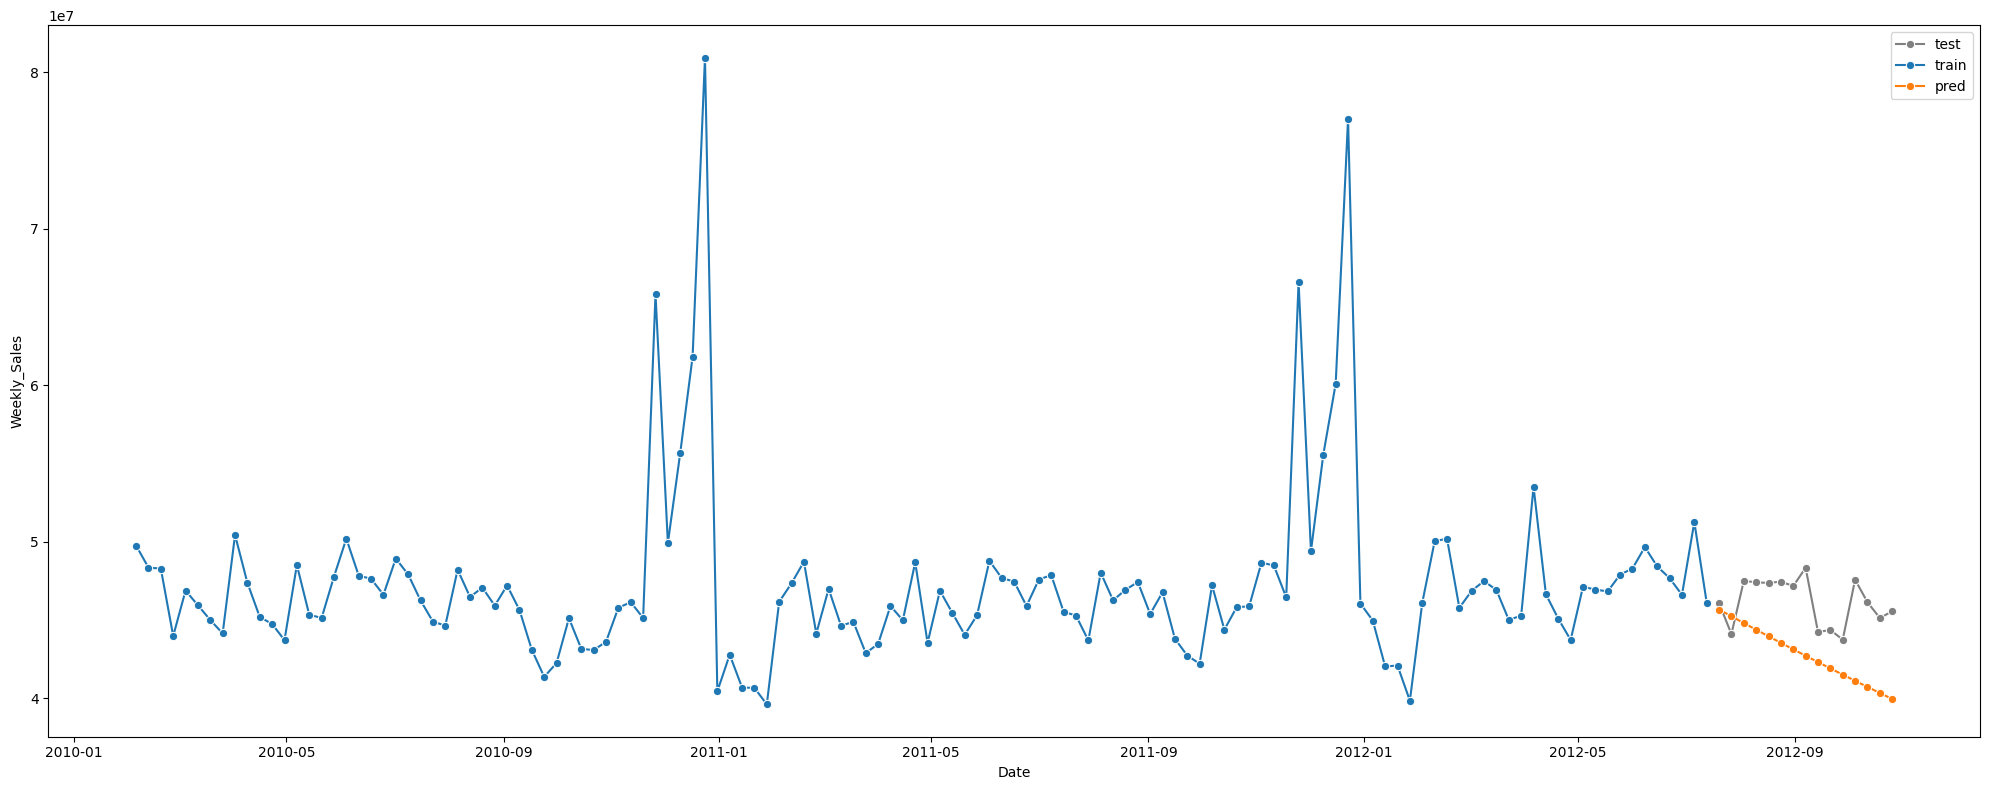

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 3221
Model:             SARIMAX(0, 0, 2)x(0, 0, [1], 12)   Log Likelihood              -45285.598
Date:                              Sun, 12 May 2024   AIC                          90579.196
Time:                                      19:22:09   BIC                          90603.506
Sample:                                           0   HQIC                         90587.909
                                             - 3221                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6346      0.054     11.651      0.000       0.528       0.741
ma.L2          0.45

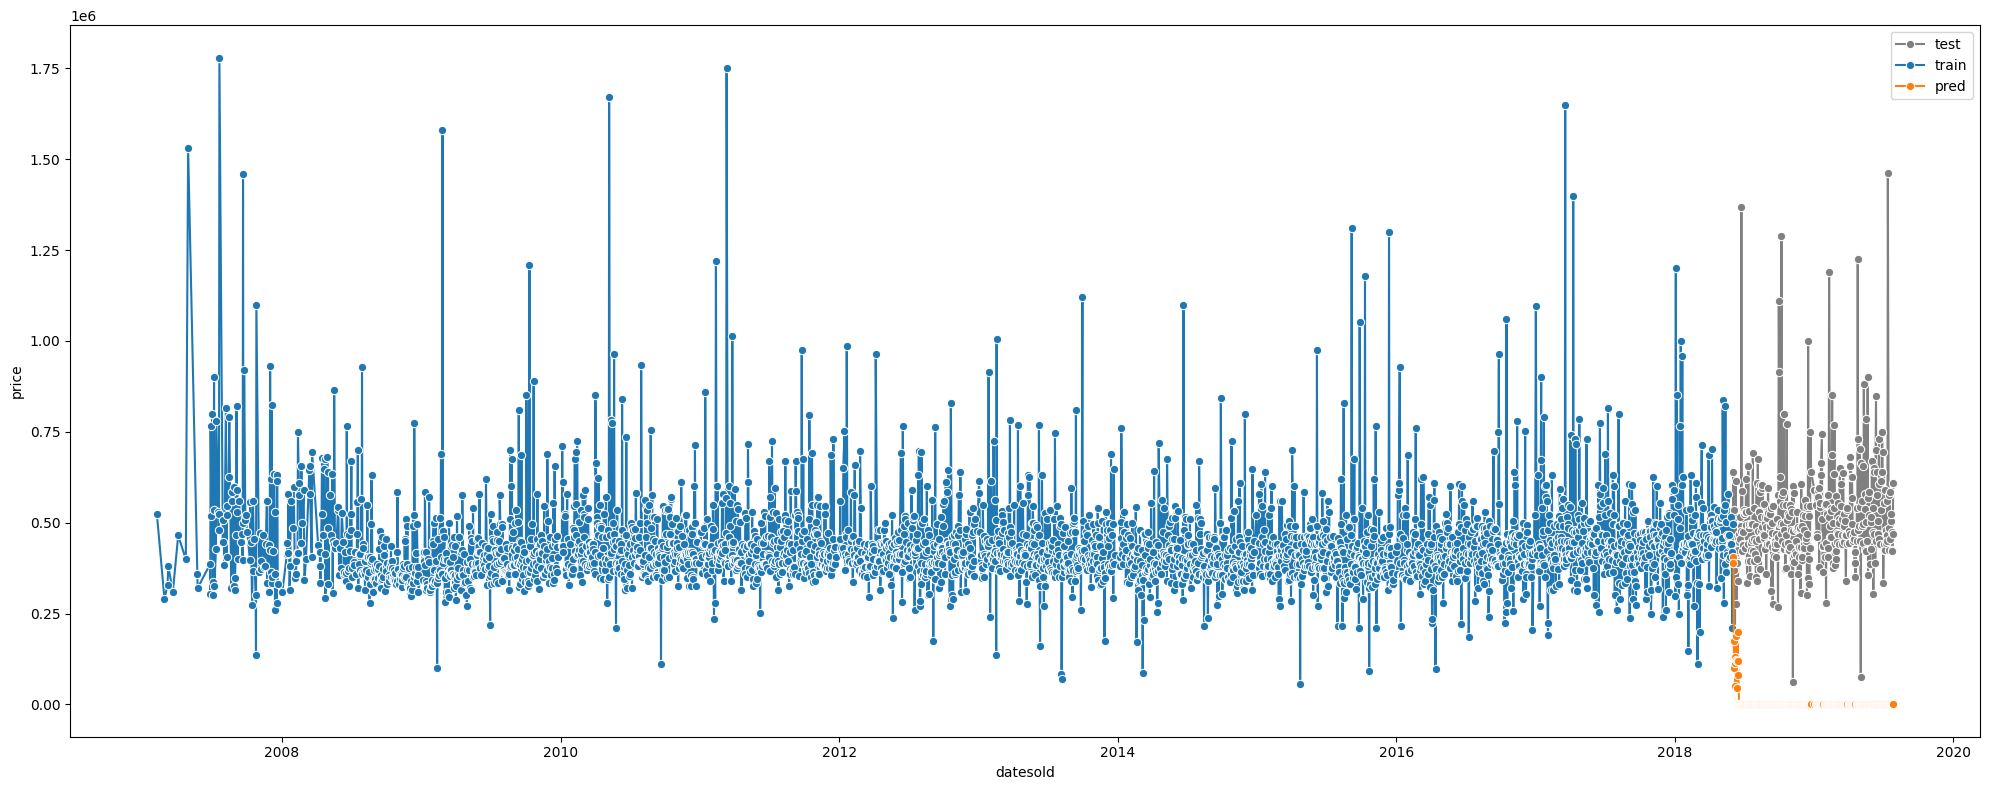

In [118]:
def SARIMA_method(train, test, order1, order2):
    model = sm.tsa.statespace.SARIMAX(
        np.asarray(train), order=order1, seasonal_order=order2
    )
    model_fit = model.fit()
    print(model_fit.summary())
    pred_ma = model_fit.get_forecast(steps=len(test))
    pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
    pred = pred_ma_series.values
    return pred


prediction_SARIMA = SARIMA_method(train_ARMA, test_ARMA, (1,0,0), (0, 0, 0, 12))
plot_predict(data_train_ready_one_feature, train_len, prediction_SARIMA, data_train_ready_one_feature.Weekly_Sales, 
             data_train_ready_one_feature.Date)

prediction_SARIMA_2 = SARIMA_method(train_ARMA_2, test_ARMA_2, (0,0,2), (0, 0, 1, 12))
plot_predict(data2_one_feature, train_len_2, prediction_SARIMA_2, data2_one_feature.price, 
             data2_one_feature.datesold)

Metody uczenia maszynowego

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import datetime as dt

In [126]:
def data_ML_one_feature2(data):
    data["datesold"] = pd.to_datetime(data["datesold"])
    data = data.copy()
    data["dayofweek"] = data.datesold.dt.weekday
    data["quarter"] = data.datesold.dt.quarter
    data["month"] = data.datesold.dt.month
    data["year"] = data.datesold.dt.year
    data["dayofyear"] = data.datesold.dt.dayofyear
    data["dayofmonth"] = data.datesold.dt.day
    data["weekofyear"] = data.datesold.dt.isocalendar().week
    train_len = int(0.9 * len(data))
    train = data[:train_len]
    test = data[train_len:]
    X_train = train[
        [
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear",
        ]
    ]
    Y_train = train[["price"]]
    X_test = test[
        [
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear",
        ]
    ]
    Y_test = test[["price"]]
    return X_train, Y_train, X_test, Y_test, train_len


X_train_one_2, Y_train_one_2, X_test_one_2, Y_test_one_2, train_len_one_2 = data_ML_one_feature2(
    data2_one_feature
)

In [62]:
def data_ML_one_feature(data):
    data["Date"] = pd.to_datetime(data["Date"])
    data = data.copy()
    data["dayofweek"] = data.Date.dt.weekday
    data["quarter"] = data.Date.dt.quarter
    data["month"] = data.Date.dt.month
    data["year"] = data.Date.dt.year
    data["dayofyear"] = data.Date.dt.dayofyear
    data["dayofmonth"] = data.Date.dt.day
    data["weekofyear"] = data.Date.dt.isocalendar().week
    train_len = int(0.9 * len(data))
    train = data[:train_len]
    test = data[train_len:]
    X_train = train[
        [
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear",
        ]
    ]
    Y_train = train[["Weekly_Sales"]]
    X_test = test[
        [
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear",
        ]
    ]
    Y_test = test[["Weekly_Sales"]]
    return X_train, Y_train, X_test, Y_test, train_len


X_train_one, Y_train_one, X_test_one, Y_test_one, train_len_one = data_ML_one_feature(
    data_train_ready_one_feature
)

In [123]:
def data_ML_many_features2(data):
    data["datesold"] = pd.to_datetime(data["datesold"])
    data = data.copy()
    data["dayofweek"] = data.datesold.dt.weekday
    data["quarter"] = data.datesold.dt.quarter
    data["month"] = data.datesold.dt.month
    data["year"] = data.datesold.dt.year
    data["dayofyear"] = data.datesold.dt.dayofyear
    data["dayofmonth"] = data.datesold.dt.day
    data["weekofyear"] = data.datesold.dt.isocalendar().week
    train_len = int(0.9 * len(data))
    train = data[:train_len]
    test = data[train_len:]
    X_train = train[
        [
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear",
            'postcode', 
            'bedrooms', 
            'propertyType_house',
            'propertyType_unit'
        ]
    ]
    Y_train = train[["price"]]
    X_test = test[
        [
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear",
            'postcode', 
            'bedrooms', 
            'propertyType_house',
            'propertyType_unit'
        ]
    ]
    Y_test = test[["price"]]
    return X_train, Y_train, X_test, Y_test, train_len


X_train_many_2, Y_train_many_2, X_test_many_2, Y_test_many_2, train_len_many_2 = data_ML_many_features2(data2_many_features)

In [124]:
def data_ML_many_features(data):
    data["Date"] = pd.to_datetime(data["Date"])
    data = data.copy()
    data["dayofweek"] = data.Date.dt.weekday
    data["quarter"] = data.Date.dt.quarter
    data["month"] = data.Date.dt.month
    data["year"] = data.Date.dt.year
    data["dayofyear"] = data.Date.dt.dayofyear
    data["dayofmonth"] = data.Date.dt.day
    data["weekofyear"] = data.Date.dt.isocalendar().week
    train_len = int(0.9 * len(data))
    train = data[:train_len]
    test = data[train_len:]
    X_train = train[
        [
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear",
            "Store",
            "IsHoliday",
        ]
    ]
    Y_train = train[["Weekly_Sales"]]
    X_test = test[
        [
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear",
            "Store",
            "IsHoliday",
        ]
    ]
    Y_test = test[["Weekly_Sales"]]
    return X_train, Y_train, X_test, Y_test, train_len


X_train_many, Y_train_many, X_test_many, Y_test_many, train_len_many = data_ML_many_features(data_train_ready_many_features)


In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import datetime
import glob
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder
import sklearn.cluster
from sklearn.cluster import KMeans
import os
from sklearn.preprocessing import StandardScaler
from datetime import date, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import pickle

In [127]:
def Decision_Tree_fit(name, X_train, Y_train):
    numerical = X_train.select_dtypes("number").columns
    max_features = ["auto", "sqrt"]
    criterion = ["friedman_mse", "absolute_error", "poisson"]
    splitter = ["best", "random"]
    max_depth = [int(z) for z in np.linspace(10, 110, num=11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    random_grid = {
        "criterion": criterion,
        "splitter": splitter,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
    }
    grid_list = {"C": np.arange(2, 10, 2), "gamma": np.arange(0.1, 1, 0.2)}
    numerical_pipe = Pipeline([("scaler", StandardScaler())])

    preprocessors = ColumnTransformer(transformers=[("num", numerical_pipe, numerical)])

    pipe = Pipeline(
        [
            ("preprocessors", preprocessors),
            # ('select',SelectKBest(score_func=f_regression, k=4)),
            (
                "tree_one_feature",
                GridSearchCV(
                    DecisionTreeRegressor(),
                    param_grid=random_grid,
                    cv=50,
                    verbose=2,
                    n_jobs=-1,
                ),
            ),
        ]
    )
    pipe.fit(X_train, Y_train)
    pickle.dump(pipe, open(name, "wb"))


Decision_Tree_fit("model_DT_one.pkl", X_train_one, Y_train_one)
Decision_Tree_fit("model_DT_one_2.pkl", X_train_one_2, Y_train_one_2)

Fitting 50 folds for each of 1296 candidates, totalling 64800 fits
Fitting 50 folds for each of 1296 candidates, totalling 64800 fits


In [128]:
def Decision_Tree_predict(name, X_test, Y_test):
    pipe = pickle.load(open(name, "rb"))
    predictions = pipe.predict(X_test)
    rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), ".3f"))
    print("\nRMSE: ", rmse)
    return predictions


prediction_DT_one = Decision_Tree_predict("model_DT_one.pkl", X_test_one, Y_test_one)
prediction_DT_one_2 = Decision_Tree_predict("model_DT_one_2.pkl", X_test_one_2, Y_test_one_2)


RMSE:  1377300.322

RMSE:  172999.951


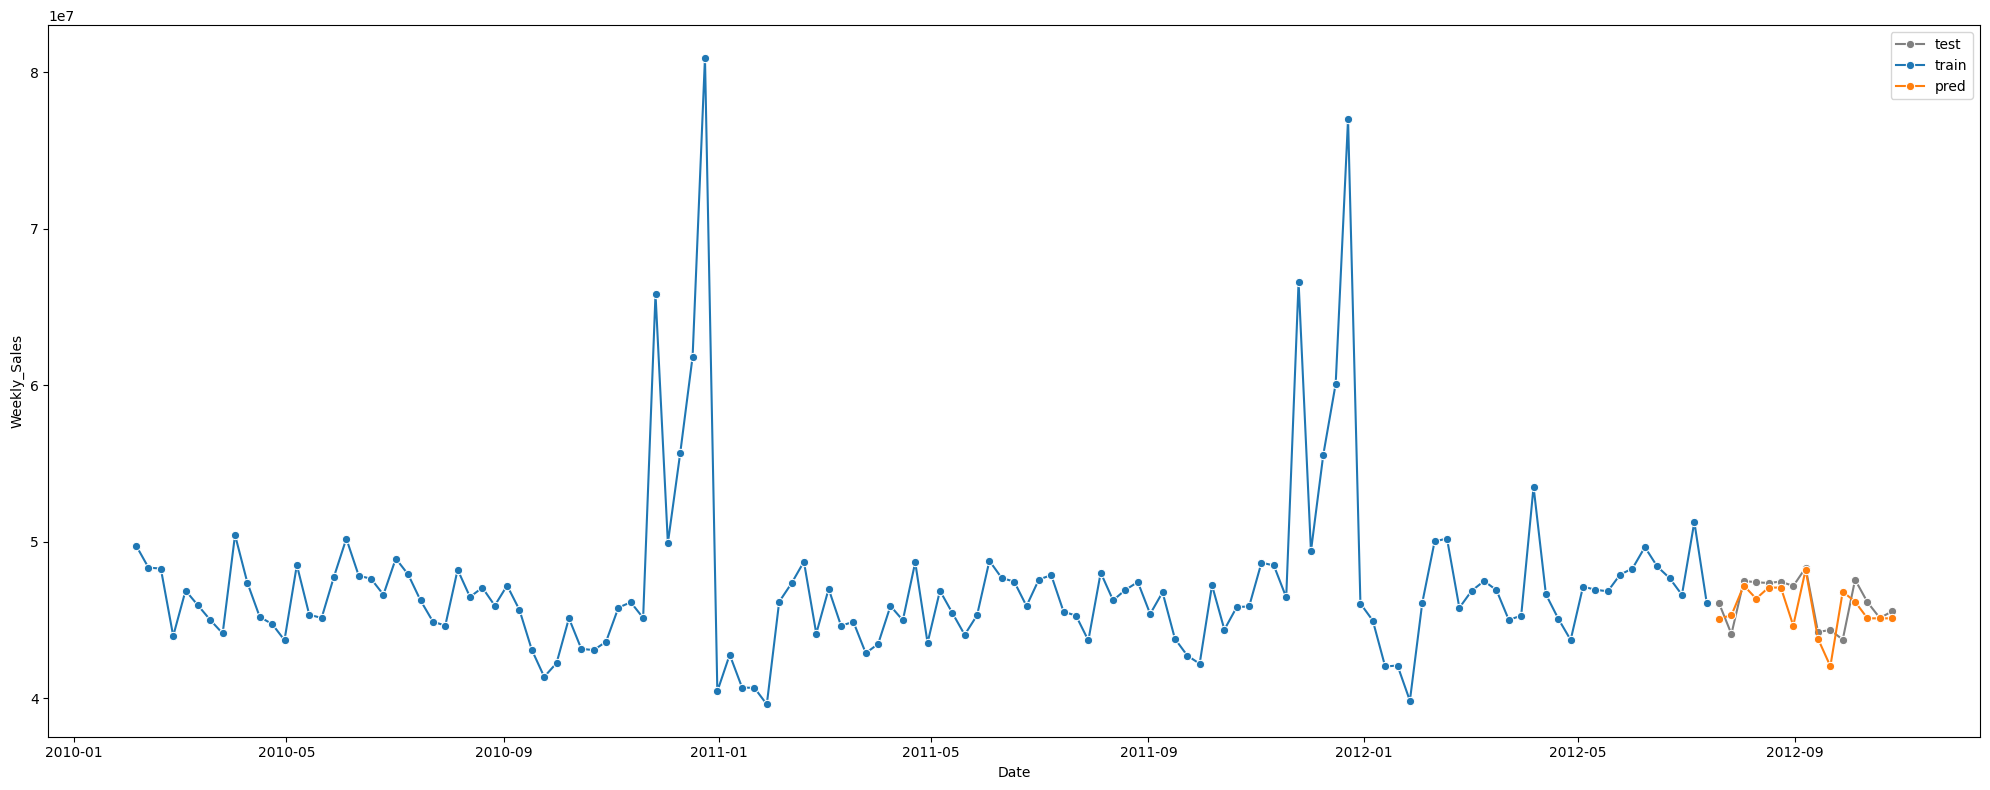

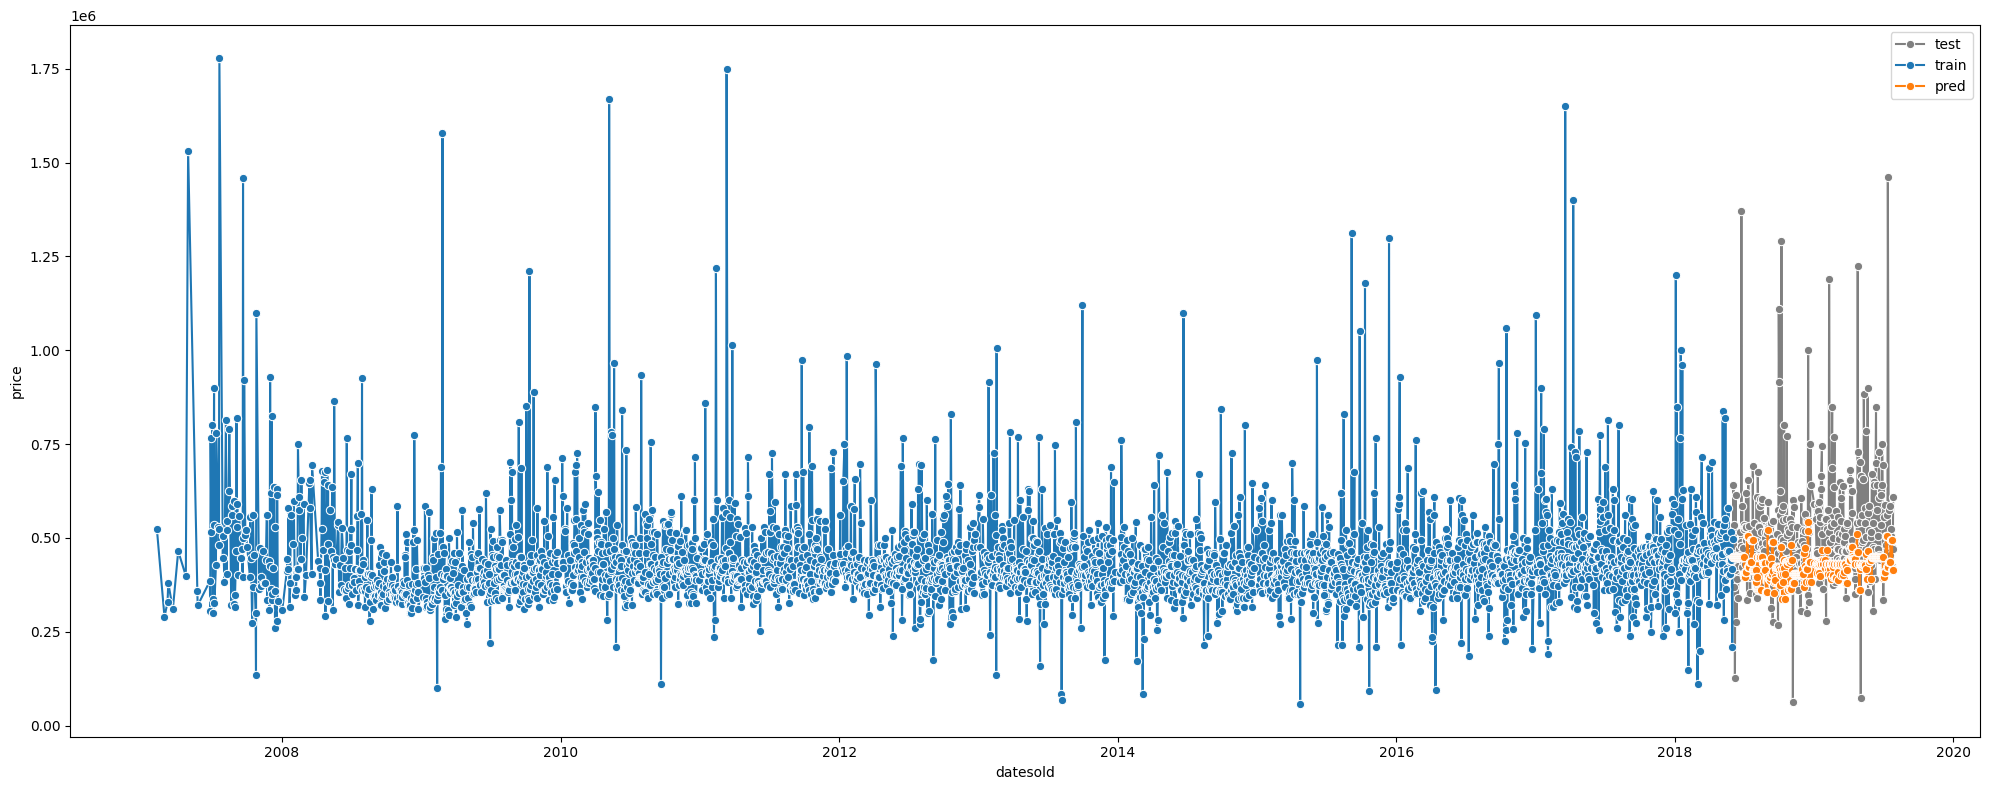

In [129]:
plot_predict(data_train_ready_one_feature, train_len_one, prediction_DT_one, data_train_ready_one_feature.Weekly_Sales, 
             data_train_ready_one_feature.Date)
plot_predict(data2_one_feature, train_len_one_2, prediction_DT_one_2, data2_one_feature.price, 
             data2_one_feature.datesold)

In [130]:
Decision_Tree_fit("model_DT_many.pkl", X_train_many, Y_train_many)
Decision_Tree_fit("model_DT_many_2.pkl", X_train_many_2, Y_train_many_2)

Fitting 50 folds for each of 1296 candidates, totalling 64800 fits
Fitting 50 folds for each of 1296 candidates, totalling 64800 fits



RMSE:  94334.657

RMSE:  139045.817


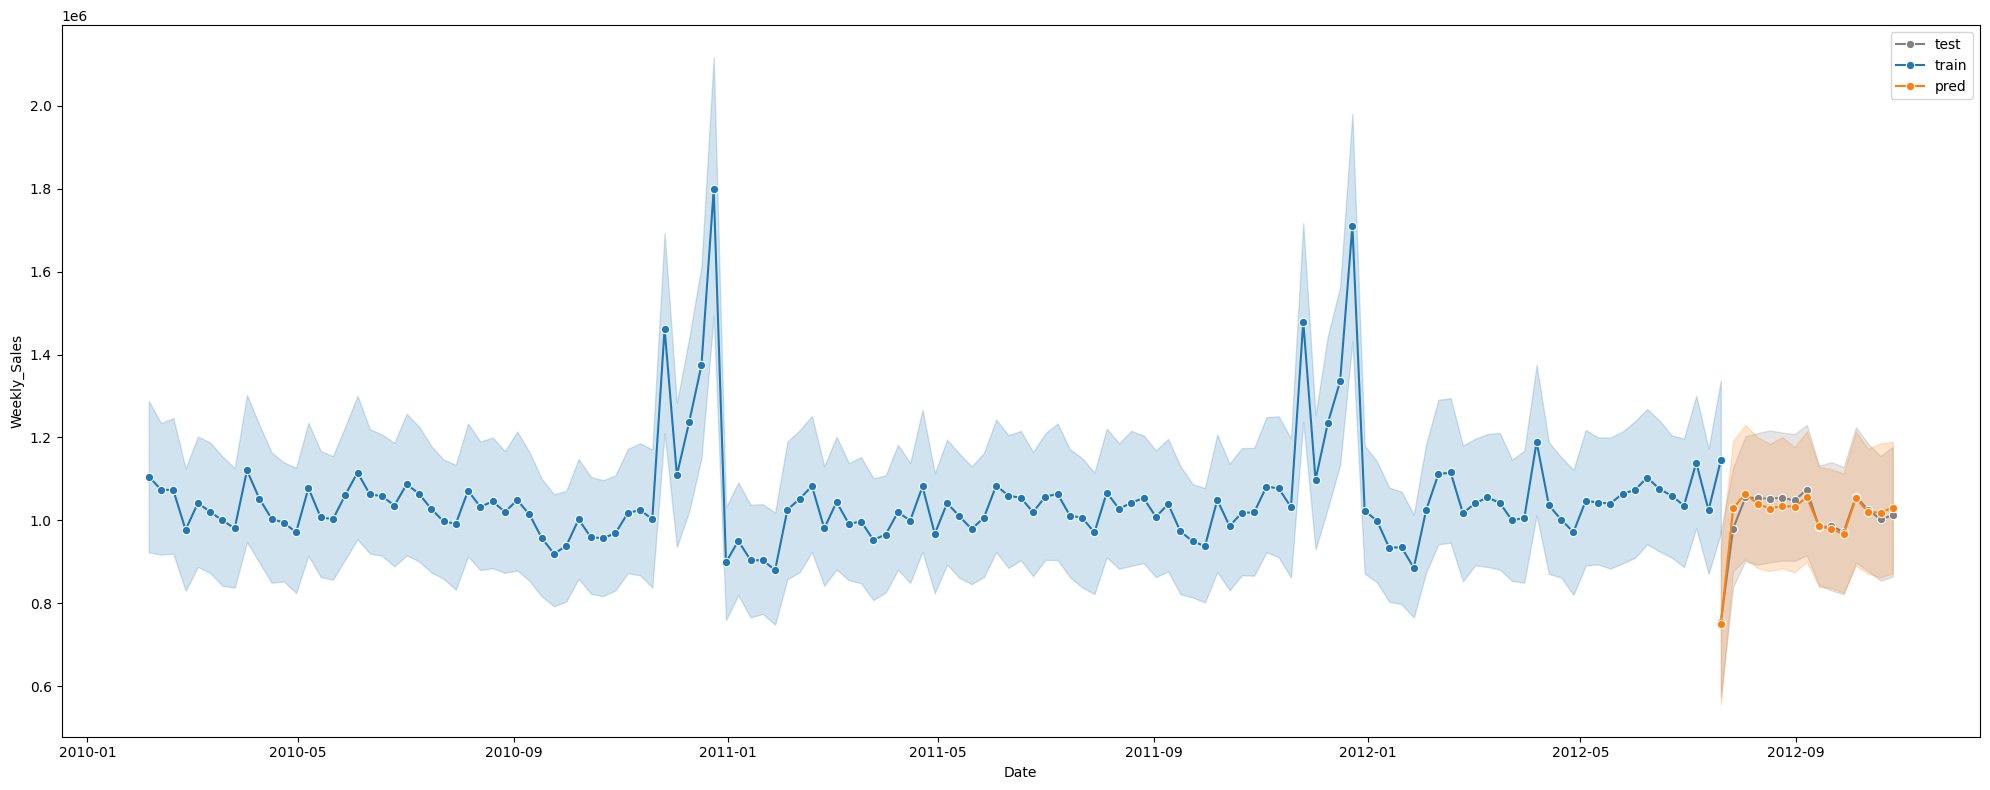

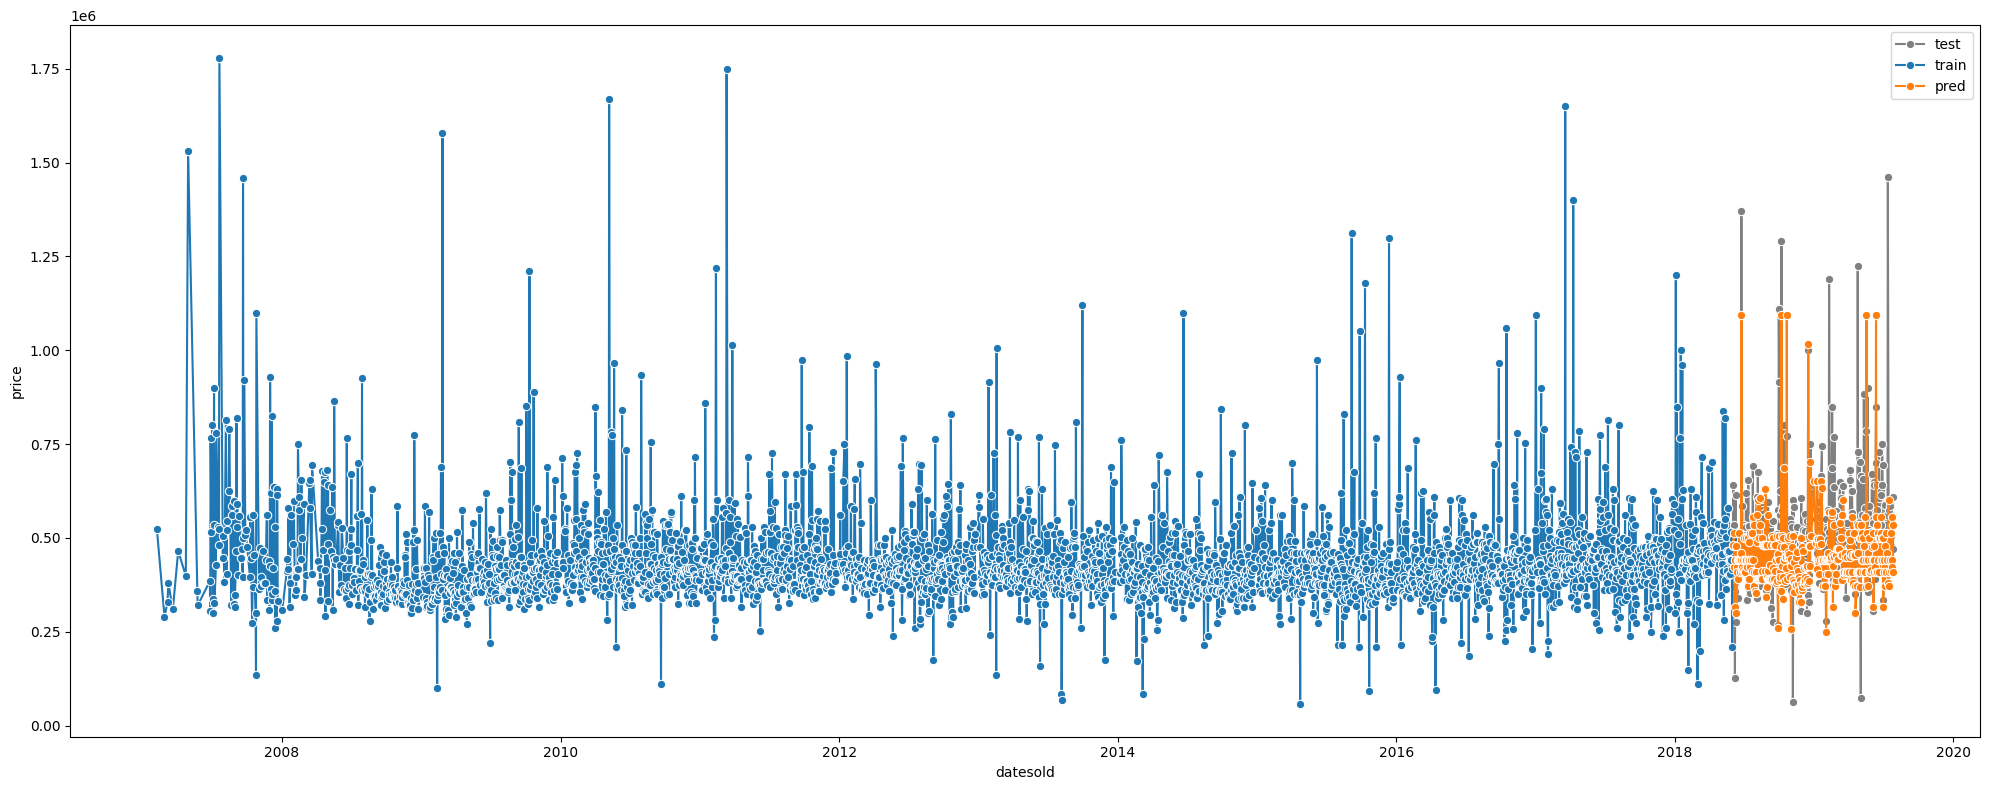

In [131]:
prediction_DT_many = Decision_Tree_predict(
    "model_DT_many.pkl", X_test_many, Y_test_many
)
prediction_DT_many_2 = Decision_Tree_predict(
    "model_DT_many_2.pkl", X_test_many_2, Y_test_many_2
)
plot_predict(data_train_ready_many_features, train_len_many, prediction_DT_many, data_train_ready_many_features.Weekly_Sales, 
             data_train_ready_many_features.Date)
plot_predict(data2_many_features, train_len_many_2, prediction_DT_many_2, data2_many_features.price, 
             data2_many_features.datesold)

In [132]:
def Random_Forest_fit(name, X_train, Y_train):
    numerical = X_train.select_dtypes("number").columns
    n_estimators = [int(z) for z in np.linspace(start=200, stop=2000, num=10)]
    max_features = ["auto", "sqrt"]
    criterion = ["friedman_mse", "absolute_error", "poisson"]
    max_depth = [int(z) for z in np.linspace(10, 110, num=11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]
    random_grid = {
        "n_estimators": n_estimators,
        "criterion": criterion,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "bootstrap": bootstrap,
    }
    grid_list = {"C": np.arange(2, 10, 2), "gamma": np.arange(0.1, 1, 0.2)}
    numerical_pipe = Pipeline([("scaler", StandardScaler())])

    preprocessors = ColumnTransformer(transformers=[("num", numerical_pipe, numerical)])

    pipe = Pipeline(
        [
            ("preprocessors", preprocessors),
            # ('select',SelectKBest(score_func=f_regression, k=4)),
            # ('tree_one_feature',GridSearchCV(RandomForestRegressor(), param_grid = random_grid,
            #     cv = 5, verbose=2, n_jobs = -1))])
            (
                "tree_one_feature",
                RandomizedSearchCV(
                    RandomForestRegressor(),
                    param_distributions=random_grid,
                    n_iter=30,
                    cv=3,
                    verbose=2,
                    random_state=42,
                    n_jobs=-1,
                ),
            ),
        ]
    )

    pipe.fit(X_train, Y_train)
    pickle.dump(pipe, open(name, "wb"))


Random_Forest_fit("model_FR_one.pkl", X_train_one, Y_train_one)
Random_Forest_fit("model_FR_many.pkl", X_train_many, Y_train_many)
Random_Forest_fit("model_FR_one_2.pkl", X_train_one_2, Y_train_one_2)
Random_Forest_fit("model_FR_many_2.pkl", X_train_many_2, Y_train_many_2)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [133]:
def Random_Forest_predict(name, X_test, Y_test):
    pipe = pickle.load(open(name, "rb"))
    predictions = pipe.predict(X_test)
    rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), ".3f"))
    print("\nRMSE: ", rmse)
    return predictions


prediction_RF_one = Random_Forest_predict("model_FR_one.pkl", X_test_one, Y_test_one)
prediction_RF_many = Random_Forest_predict(
    "model_FR_many.pkl", X_test_many, Y_test_many
)

prediction_RF_one_2 = Random_Forest_predict("model_FR_one_2.pkl", X_test_one_2, Y_test_one_2)
prediction_RF_many_2 = Random_Forest_predict(
    "model_FR_many_2.pkl", X_test_many_2, Y_test_many_2
)


RMSE:  770574.445

RMSE:  171091.677

RMSE:  152456.553

RMSE:  122931.534


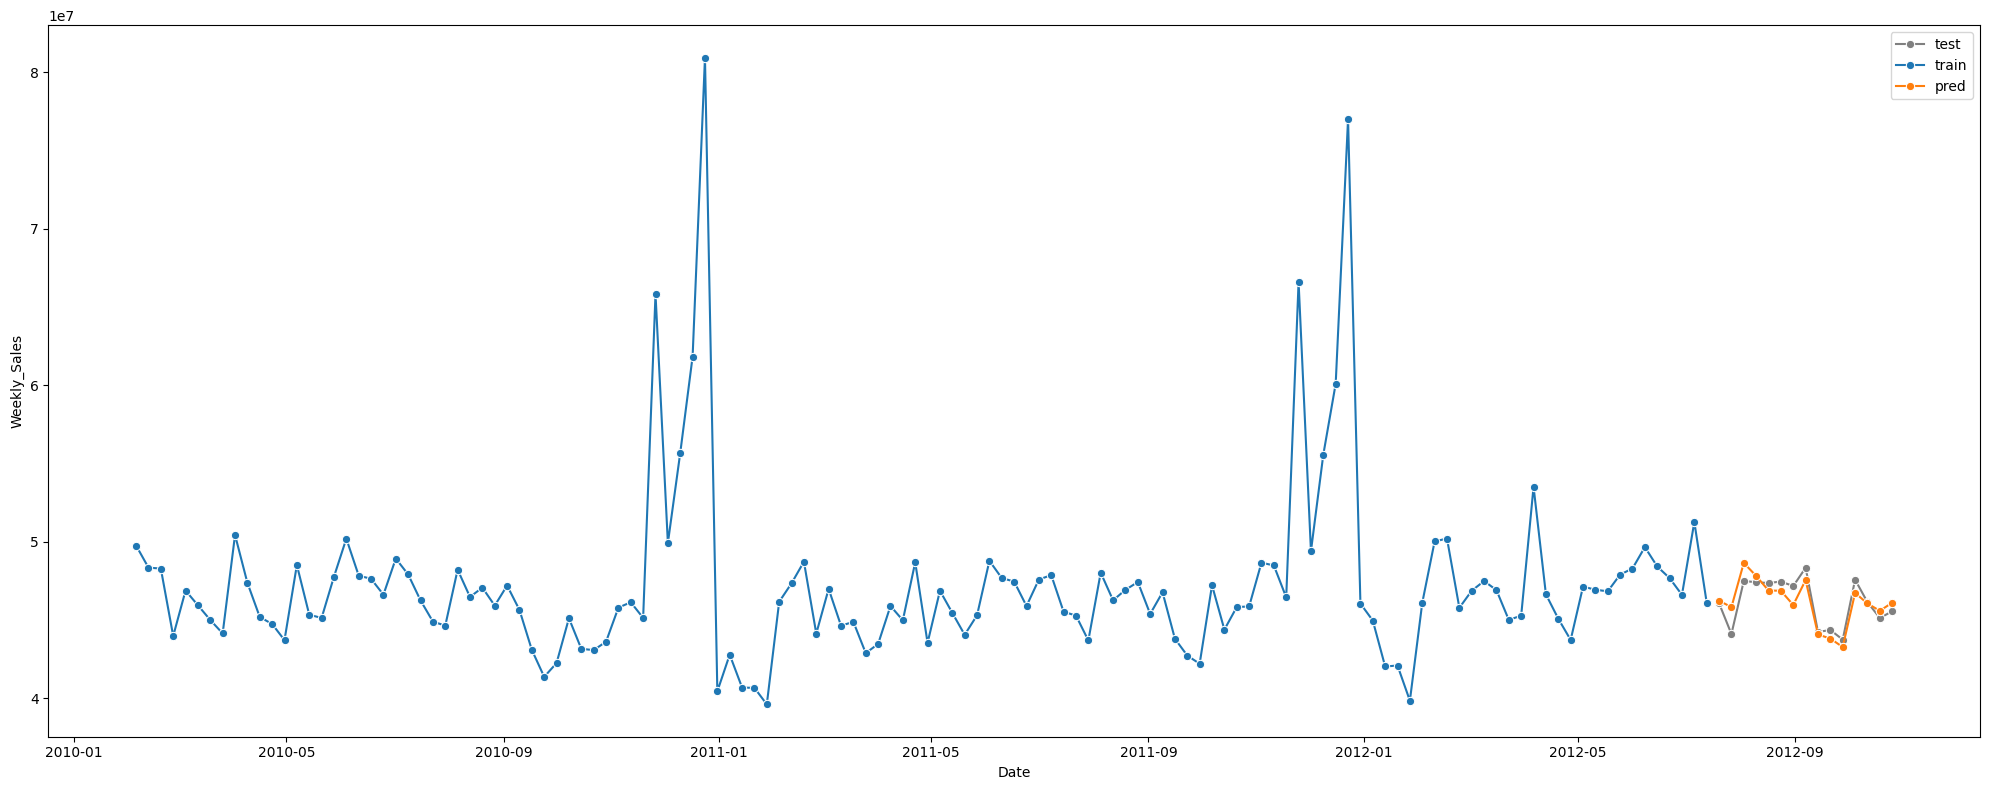

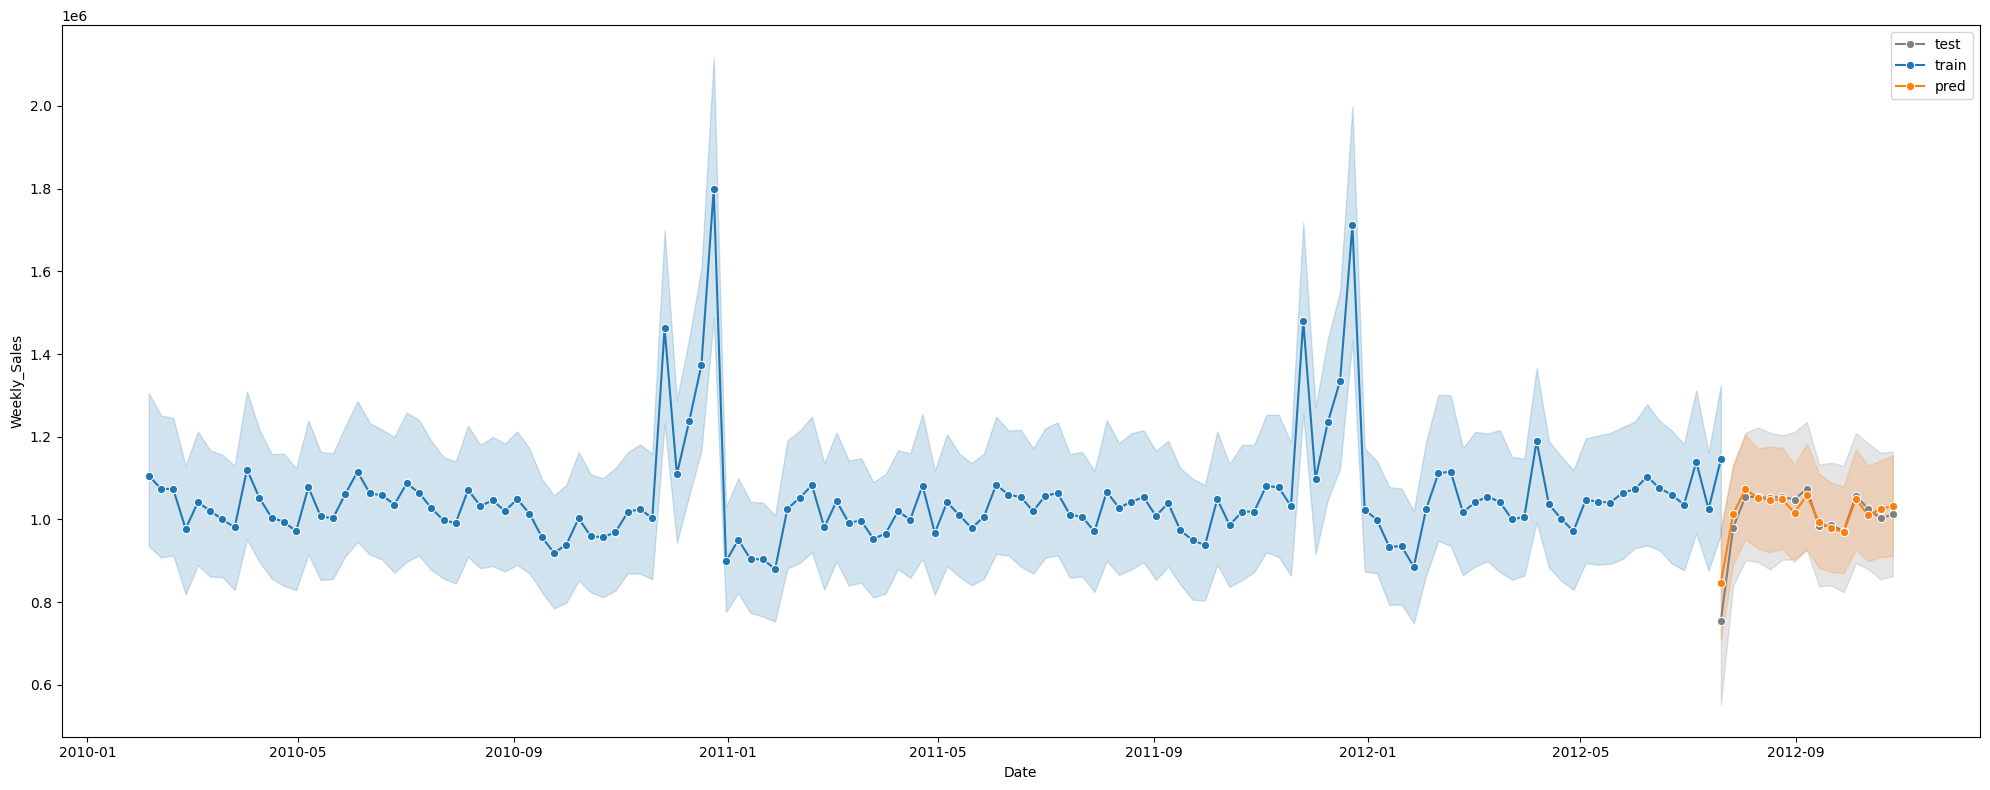

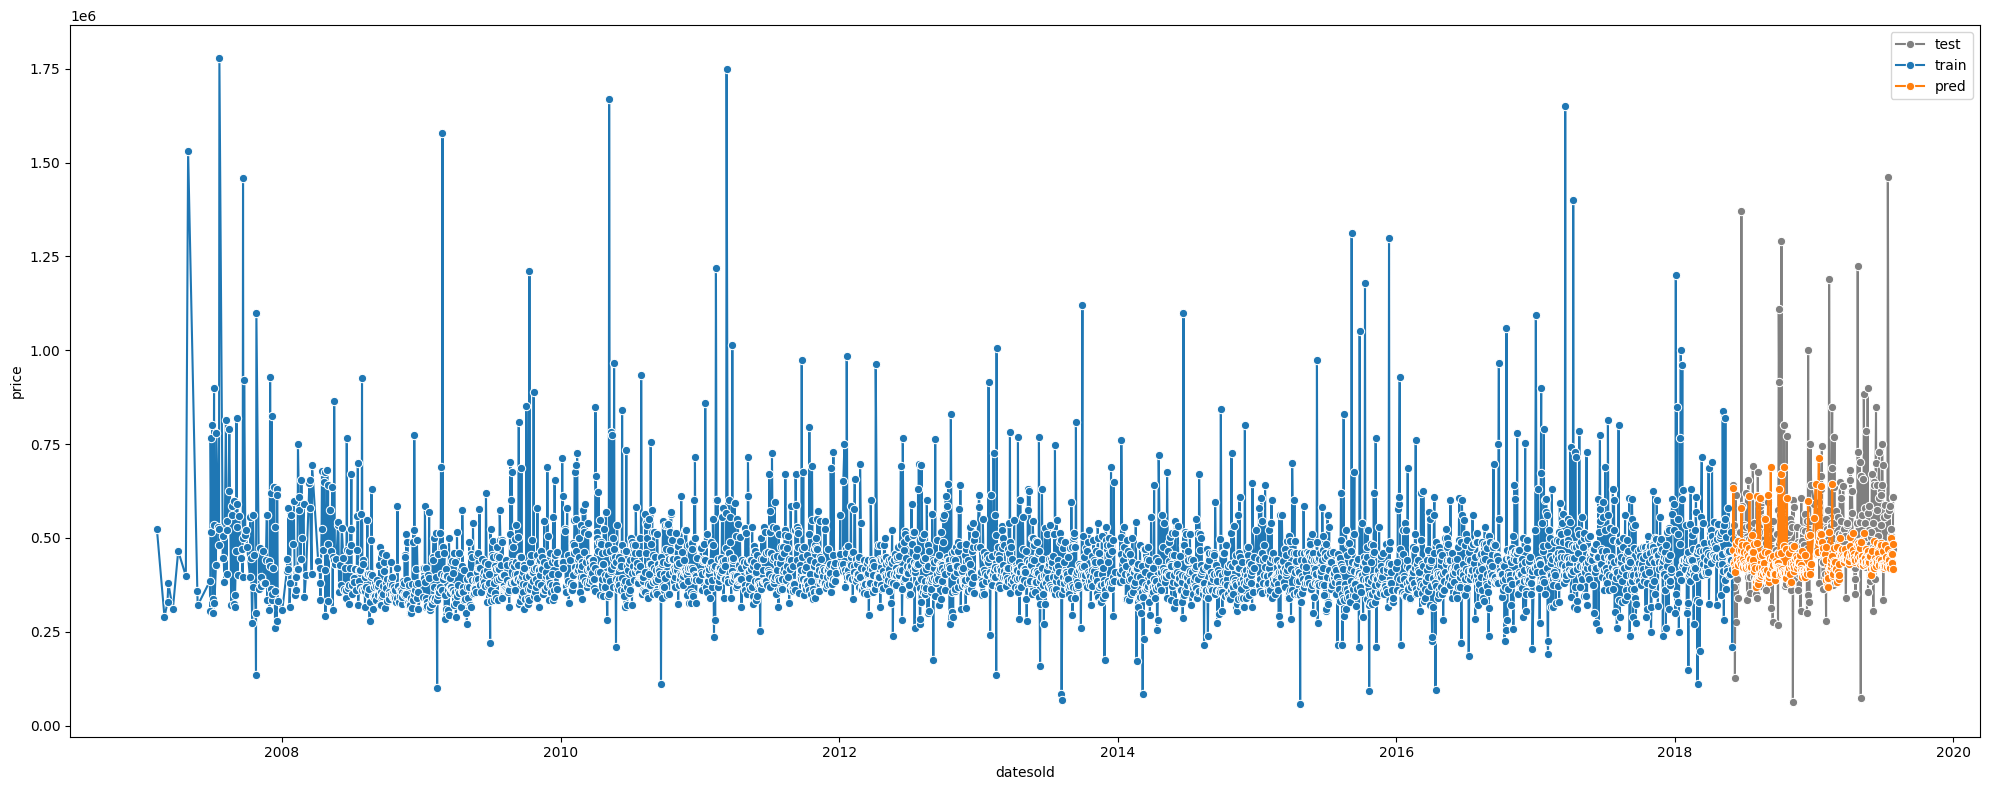

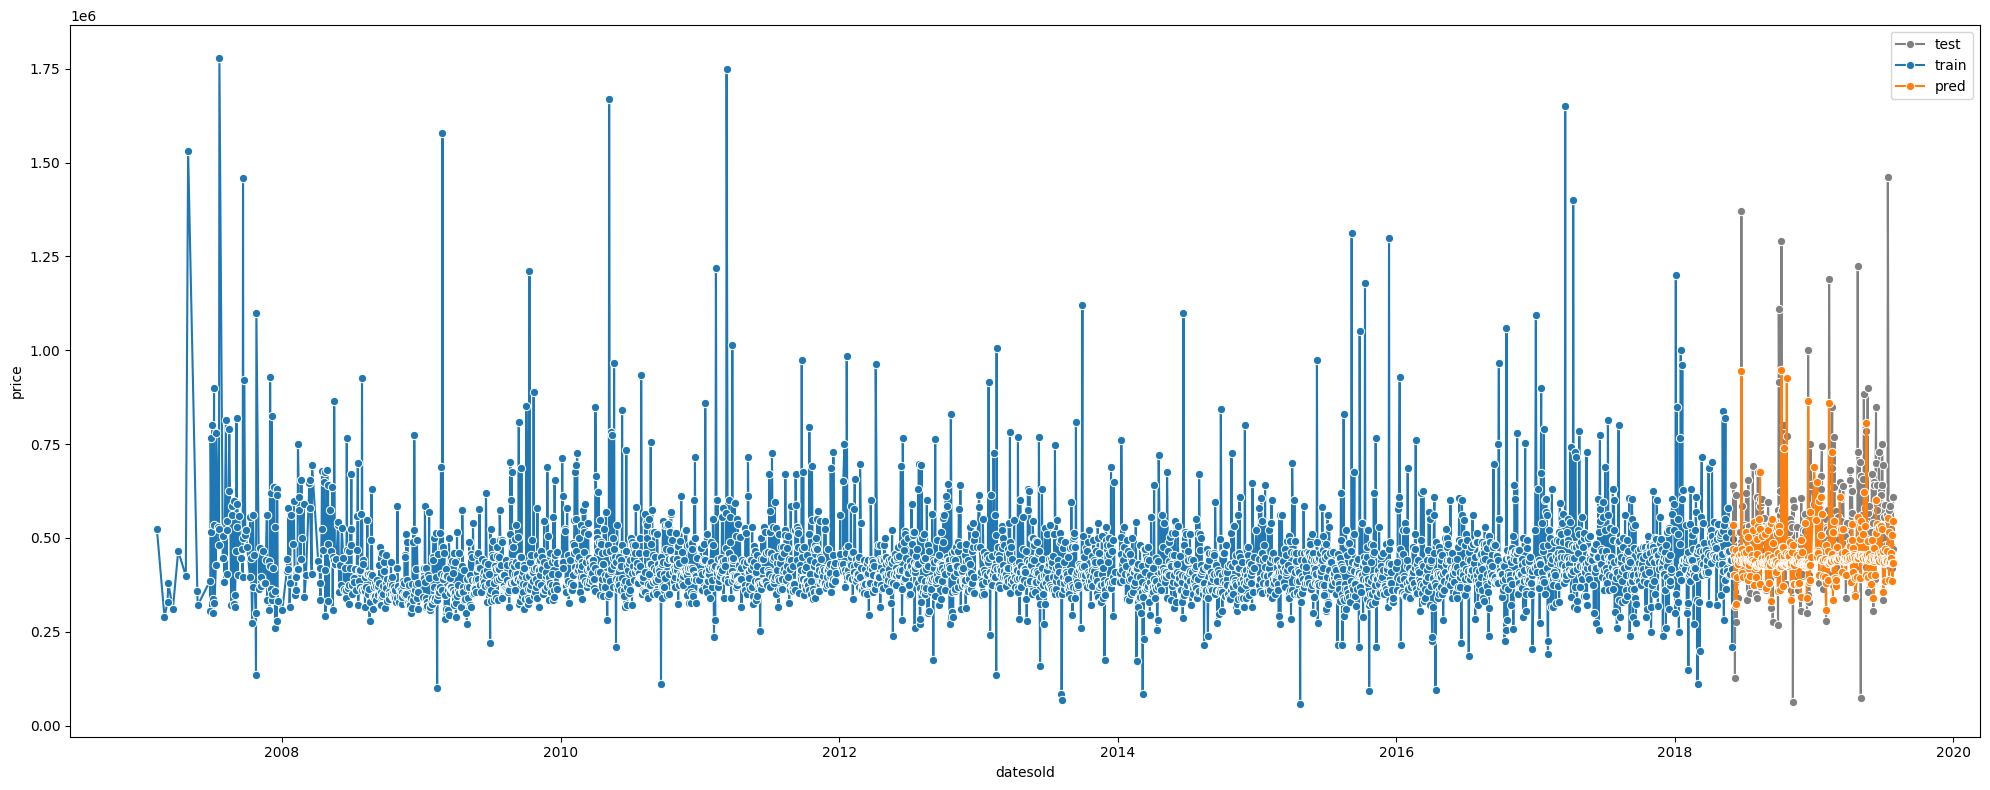

In [135]:
plot_predict(data_train_ready_one_feature, train_len_one, prediction_RF_one, data_train_ready_one_feature.Weekly_Sales, 
             data_train_ready_one_feature.Date)
plot_predict(data_train_ready_many_features, train_len_many, prediction_RF_many, data_train_ready_many_features.Weekly_Sales, 
             data_train_ready_many_features.Date)

plot_predict(data2_one_feature, train_len_one_2, prediction_RF_one_2, data2_one_feature.price, 
             data2_one_feature.datesold)
plot_predict(data2_many_features, train_len_many_2, prediction_RF_many_2, data2_many_features.price, 
             data2_many_features.datesold)

In [136]:
from xgboost import XGBRegressor

In [137]:
def XGB_method_fit(name, X_train, Y_train):
    numerical = X_train.select_dtypes("number").columns
    n_estimators = [int(z) for z in np.linspace(start=200, stop=2000, num=10)]
    max_depth = [int(z) for z in np.linspace(10, 110, num=11)]
    max_depth.append(None)
    eta = [int(z) for z in np.linspace(0, 1, num=10)]
    subsample = [int(z) for z in np.linspace(0.05, 1, num=10)]
    colsample_bytree = [int(z) for z in np.linspace(0.05, 1, num=10)]
    random_grid = {
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "eta": eta,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
    }
    grid_list = {"C": np.arange(2, 10, 2), "gamma": np.arange(0.1, 1, 0.2)}
    numerical_pipe = Pipeline([("scaler", StandardScaler())])

    preprocessors = ColumnTransformer(transformers=[("num", numerical_pipe, numerical)])

    pipe = Pipeline(
        [
            ("preprocessors", preprocessors),
            # ('select',SelectKBest(score_func=f_regression, k=4)),
            # ('tree_one_feature',GridSearchCV(XGBRegressor(), param_grid = random_grid,
            #     cv = 5, verbose=2, n_jobs = -1))])
            (
                "tree_one_feature",
                RandomizedSearchCV(
                    XGBRegressor(),
                    param_distributions=random_grid,
                    n_iter=30,
                    cv=3,
                    verbose=2,
                    random_state=42,
                    n_jobs=-1,
                ),
            ),
        ]
    )

    pipe.fit(X_train, Y_train)
    pickle.dump(pipe, open(name, "wb"))


XGB_method_fit("model_XGB_one.pkl", X_train_one, Y_train_one)
XGB_method_fit("model_XGB_many.pkl", X_train_many, Y_train_many)

XGB_method_fit("model_XGB_one_2.pkl", X_train_one_2, Y_train_one_2)
XGB_method_fit("model_XGB_many_2.pkl", X_train_many_2, Y_train_many_2)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [138]:
def XGB_method_predict(name, X_test, Y_test):
    pipe = pickle.load(open(name, "rb"))
    predictions = pipe.predict(X_test)
    rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), ".3f"))
    print("\nRMSE: ", rmse)
    return predictions


prediction_XGB_one = XGB_method_predict("model_XGB_one.pkl", X_test_one, Y_test_one)
prediction_XGB_many = XGB_method_predict("model_XGB_many.pkl", X_test_many, Y_test_many)

prediction_XGB_one_2 = XGB_method_predict("model_XGB_one_2.pkl", X_test_one_2, Y_test_one_2)
prediction_XGB_many_2 = XGB_method_predict("model_XGB_many_2.pkl", X_test_many_2, Y_test_many_2)


RMSE:  892170.077

RMSE:  71806.979

RMSE:  168758.123

RMSE:  125341.688


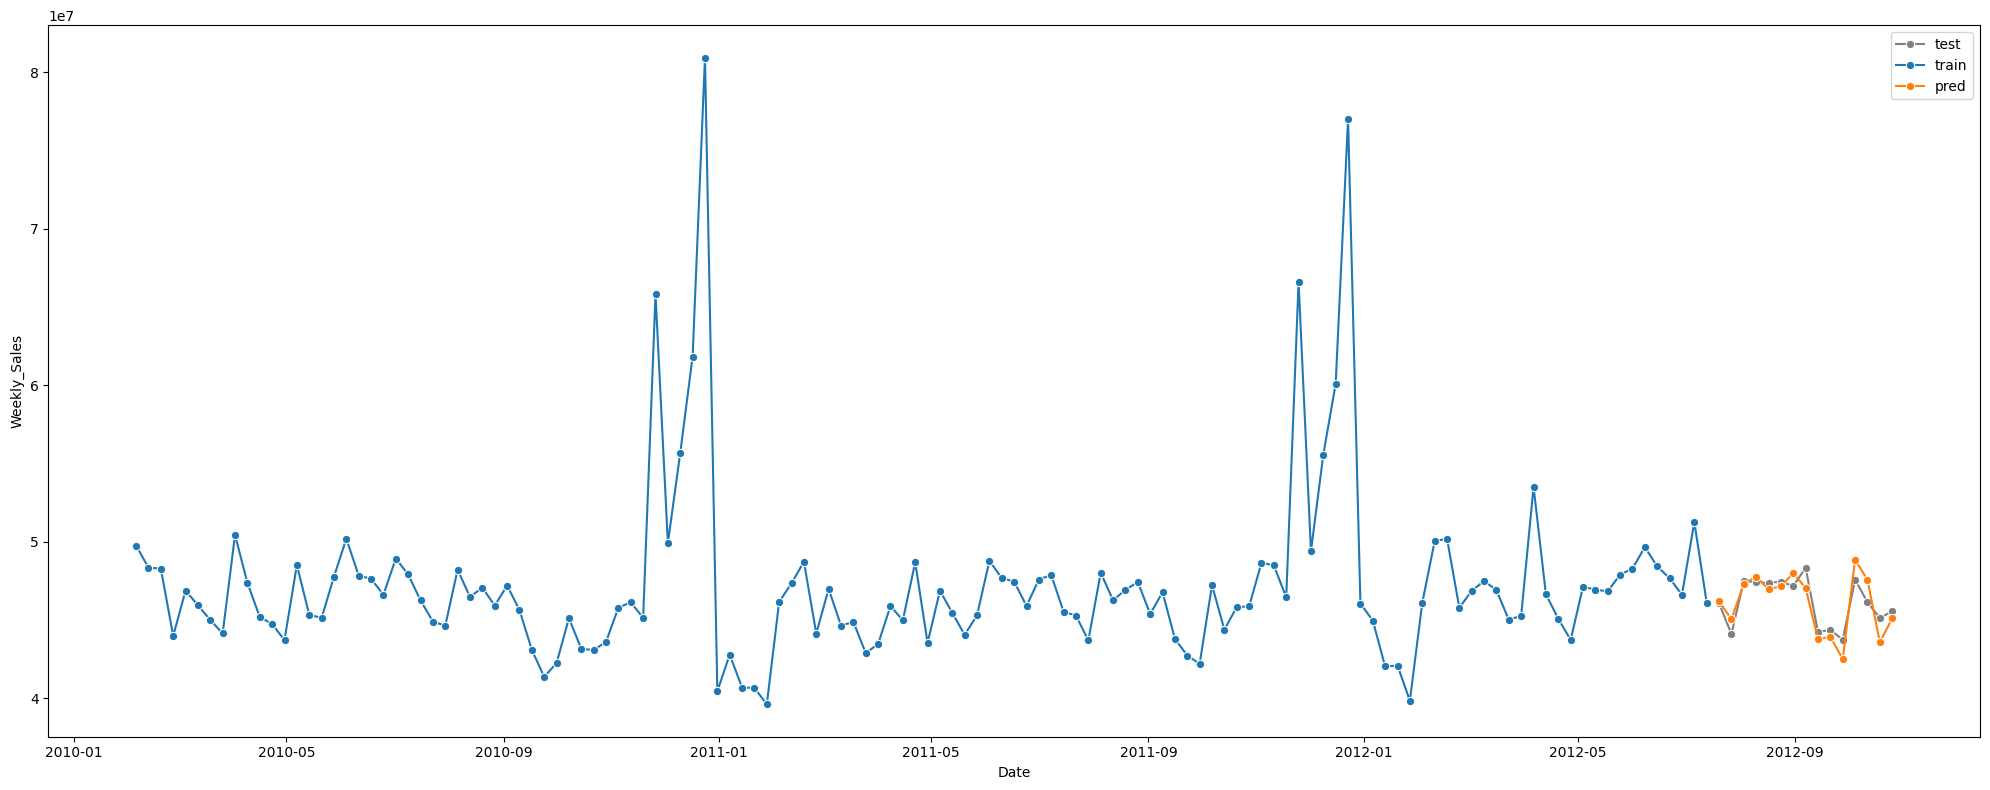

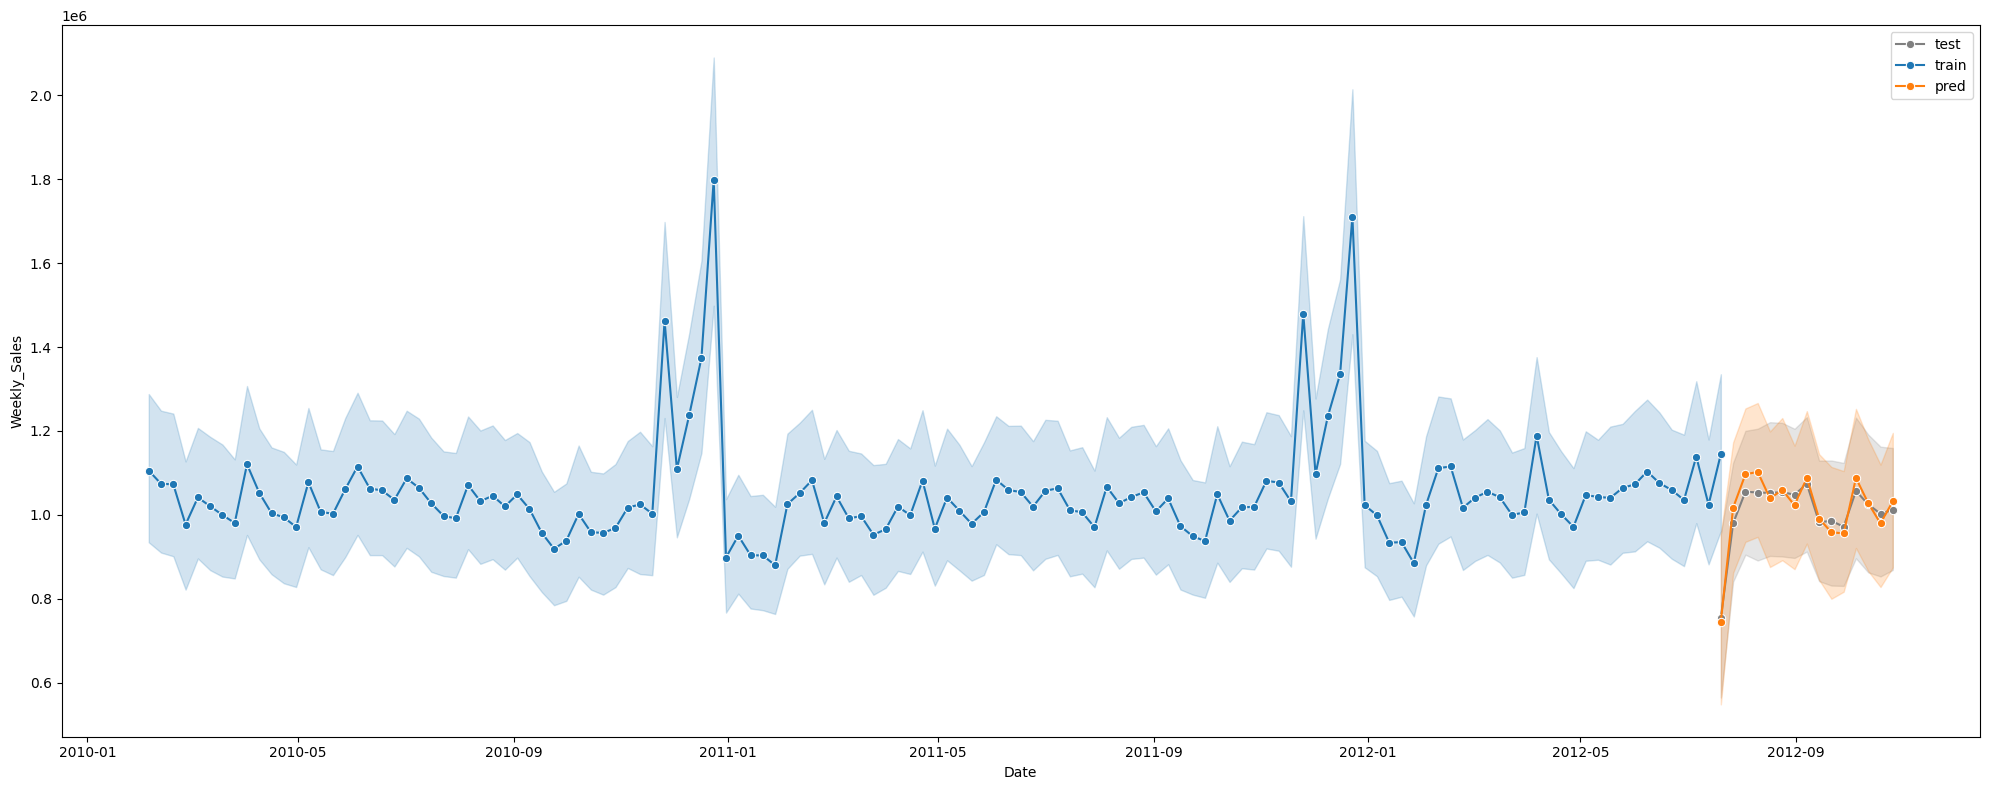

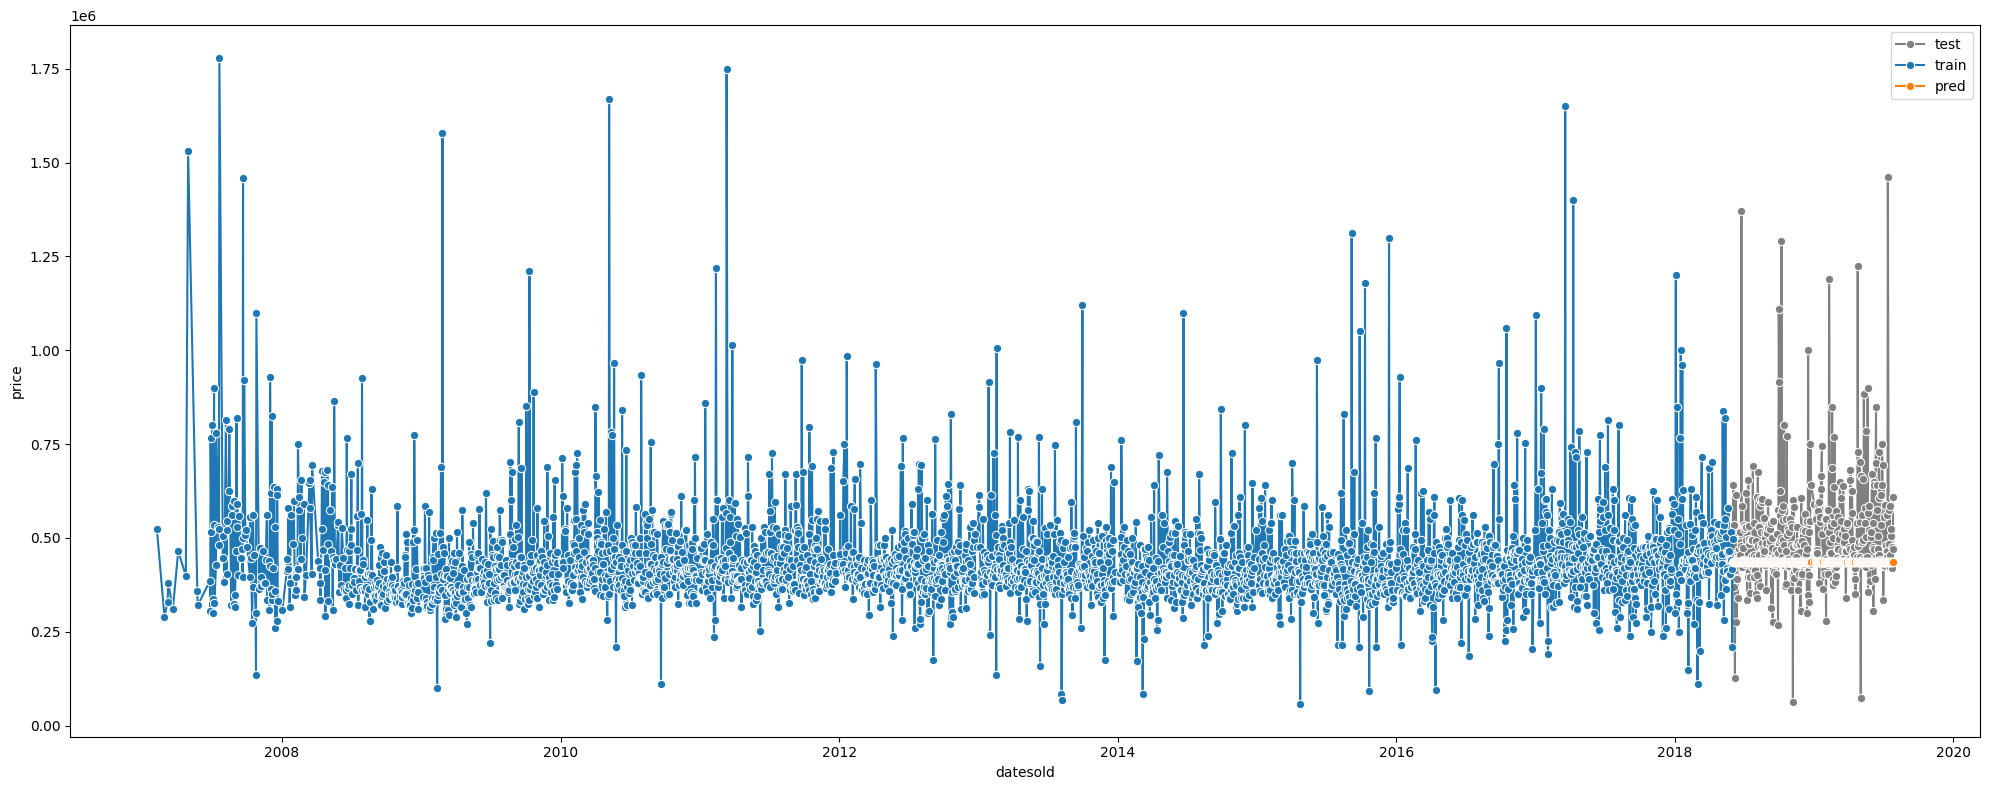

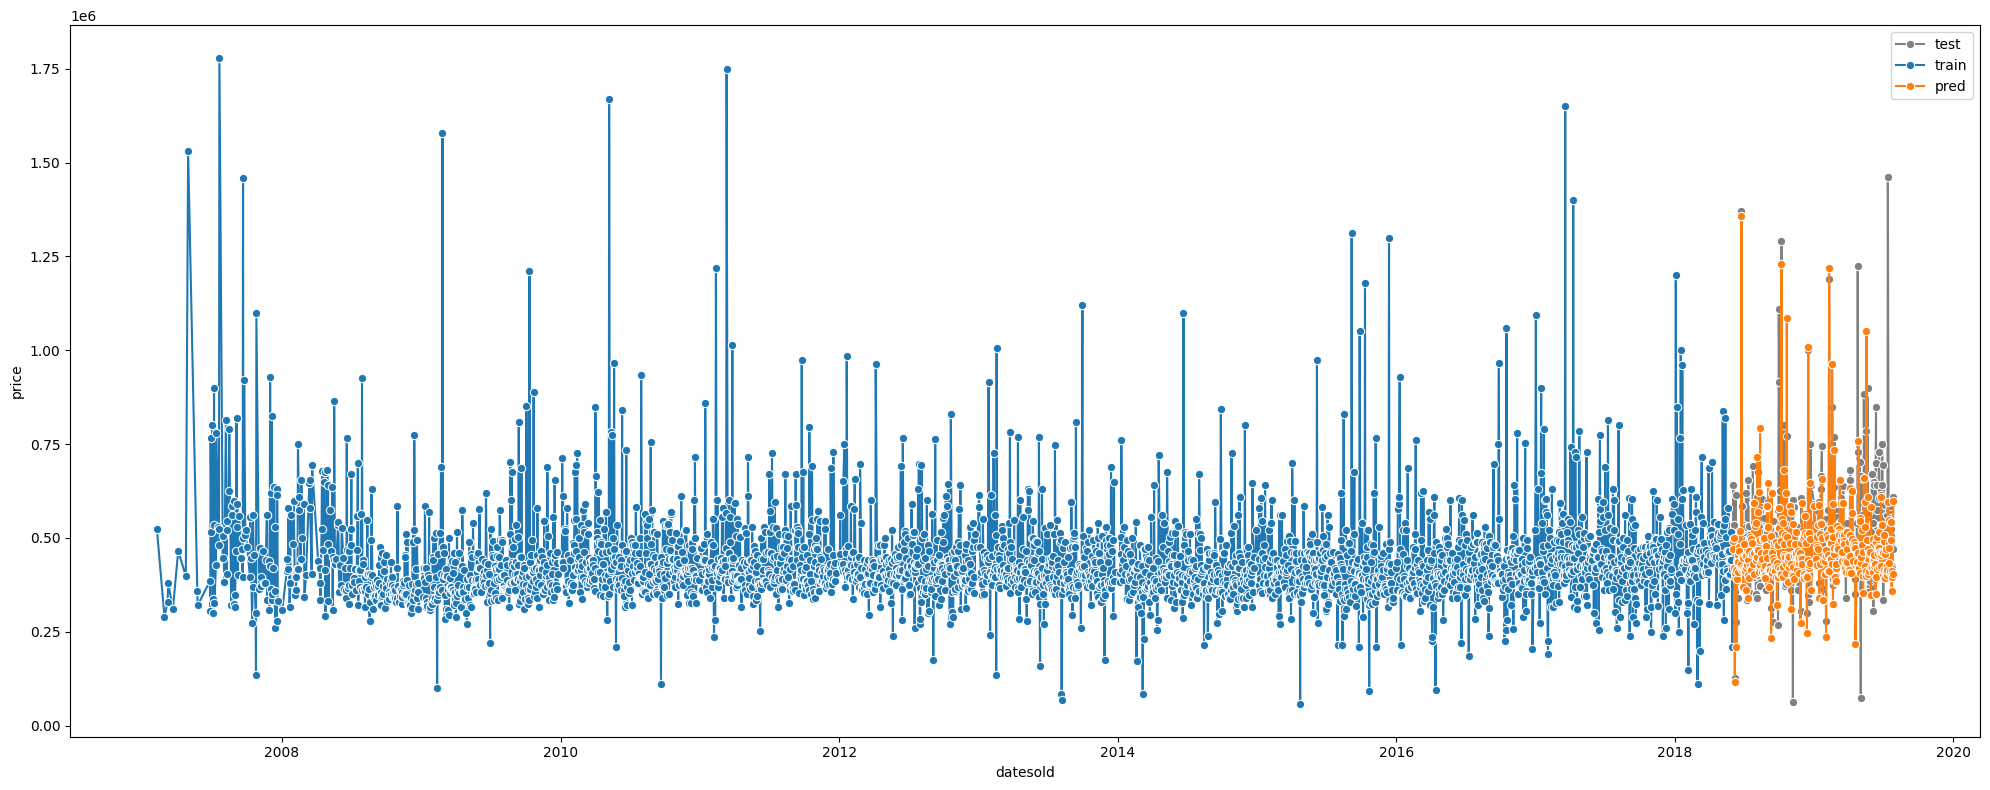

In [139]:
plot_predict(data_train_ready_one_feature, train_len_one, prediction_XGB_one, data_train_ready_one_feature.Weekly_Sales, 
             data_train_ready_one_feature.Date)
plot_predict(data_train_ready_many_features, train_len_many, prediction_XGB_many, data_train_ready_many_features.Weekly_Sales, 
             data_train_ready_many_features.Date)

plot_predict(data2_one_feature, train_len_one_2, prediction_XGB_one_2, data2_one_feature.price, 
             data2_one_feature.datesold)
plot_predict(data2_many_features, train_len_many_2, prediction_XGB_many_2, data2_many_features.price, 
             data2_many_features.datesold)

Sieci neuronowe - MLP

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def data_neural_many_features(data):
    data["Date"] = pd.to_datetime(data["Date"])
    data = data.copy()
    data["dayofweek"] = data.Date.dt.weekday
    data["quarter"] = data.Date.dt.quarter
    data["month"] = data.Date.dt.month
    data["year"] = data.Date.dt.year
    data["dayofyear"] = data.Date.dt.dayofyear
    data["dayofmonth"] = data.Date.dt.day
    data["weekofyear"] = data.Date.dt.isocalendar().week
    train_len = int(0.9 * len(data))
    train = data[:train_len]
    test = data[train_len:]
    validation_len = int(0.1 * len(train))
    validation = train[:validation_len]
    train = train[validation_len:]
    X_train = train[
        [
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear",
            "Store",
            "IsHoliday",
        ]
    ]
    Y_train = train[["Weekly_Sales"]]
    X_test = test[
        [
            "dayofweek",
            "quarter",
            "month",
            "year",
            "dayofyear",
            "dayofmonth",
            "weekofyear",
            "Store",
            "IsHoliday",
        ]
    ]
    Y_test = test[["Weekly_Sales"]]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    # X_valid = validation[[ 'dayofweek', 'quarter', 'month', 'year',
    #     'dayofyear', 'dayofmonth', 'weekofyear','Store', 'IsHoliday']]
    # Y_valid = validation[['Weekly_Sales']]
    return X_train, Y_train, X_test, Y_test


X_train, Y_train, X_test, Y_test = data_neural_many_features(
    data_train_ready_many_features
)

In [ ]:
def MLP_fit(X_train, Y_train, X_test, Y_test):
    input_shape = (9,)
    model = Sequential()
    model.add(Dense(64, input_shape=input_shape, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation="linear"))
    model.compile(
        loss="mean_absolute_error", optimizer="adam", metrics=["mean_squared_error"]
    )
    model.fit(
        X_train,
        Y_train,
        epochs=20,
        batch_size=10,
        verbose=1,
        validation_data=(X_test, Y_test),
    )
    pickle.dump(model, open("model_MLP.pkl", "wb"))
    model.summary()


MLP_fit(X_train, Y_train, X_test, Y_test)

In [ ]:
def neural_networks_predict(name, X_train, Y_train, X_test, Y_test):
    model = pickle.load(open(name, "rb"))
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    pred = y_test_pred[:, 0]
    rmse_train = float(
        format(np.sqrt(mean_squared_error(Y_train, y_train_pred)), ".3f")
    )
    rmse_test = float(format(np.sqrt(mean_squared_error(Y_test, y_test_pred)), ".3f"))
    print(rmse_train)
    print(rmse_test)
    return pred

In [ ]:
MLP_prediction = neural_networks_predict(
    "model_MLP.pkl", X_train, Y_train, X_test, Y_test
)
plot_predict(data_train_ready_many_features, train_len_many, MLP_prediction)

CNN

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, add, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import (
    Convolution2D,
    MaxPool2D,
    BatchNormalization,
    MaxPooling1D,
    Conv1D,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
def CNN_fit(X_train, Y_train, X_test, Y_test):
    model_cnn = Sequential()
    model_cnn.add(
        Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(9, 1))
    )
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation="relu"))
    # model_cnn.add(MaxPooling1D(pool_size=2))
    # model_cnn.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(50, activation="relu"))
    model_cnn.add(Dense(1))

    model_cnn.compile(
        loss="mean_absolute_error", optimizer="adam", metrics=["mean_squared_error"]
    )
    model_cnn.summary()
    model_cnn.fit(
        X_train,
        Y_train,
        epochs=20,
        batch_size=10,
        verbose=1,
        validation_data=(X_test, Y_test),
    )
    pickle.dump(model_cnn, open("model_CNN.pkl", "wb"))


CNN_fit(X_train, Y_train, X_test, Y_test)

# y_train_pred = model_cnn.predict(X_train)
# y_test_pred = model_cnn.predict(X_test)
# pred = y_test_pred[:,0]
# rmse_train = float(format(np.sqrt(mean_squared_error(Y_train, y_train_pred)), '.3f'))
# rmse_test = float(format(np.sqrt(mean_squared_error(Y_test, y_test_pred)), '.3f'))
# print(rmse_train)
# print(rmse_test)

In [ ]:
CNN_prediction = neural_networks_predict(
    "model_CNN.pkl", X_train, Y_train, X_test, Y_test
)
plot_predict(data_train_ready_many_features, train_len_many, CNN_prediction)

RNN

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
def RNN_fit(X_train, Y_train, X_test, Y_test):
    model_rnn = Sequential()
    model_rnn.add(
        SimpleRNN(
            units=128, activation="relu", return_sequences=True, input_shape=(9, 1)
        )
    )
    model_rnn.add(Dropout(0.5))

    model_rnn.add(SimpleRNN(units=64, activation="relu", return_sequences=True))

    model_rnn.add(SimpleRNN(units=32, activation="relu", return_sequences=True))

    model_rnn.add(SimpleRNN(units=16, activation="relu", return_sequences=True))

    model_rnn.add(SimpleRNN(units=50))
    model_rnn.add(Dense(units=1, activation="sigmoid"))
    model_rnn.compile(
        loss="mean_absolute_error", optimizer="adam", metrics=["mean_squared_error"]
    )
    model_rnn.summary()
    model_rnn.fit(
        X_train,
        Y_train,
        epochs=10,
        batch_size=10,
        verbose=1,
        validation_data=(X_test, Y_test),
    )
    pickle.dump(model_rnn, open("model_RNN.pkl", "wb"))


RNN_fit(X_train, Y_train, X_test, Y_test)

# y_train_pred = model_rnn.predict(X_train)
# y_test_pred = model_rnn.predict(X_test)
# pred = y_test_pred[:,0]
# rmse_train = float(format(np.sqrt(mean_squared_error(Y_train, y_train_pred)), '.3f'))
# rmse_test = float(format(np.sqrt(mean_squared_error(Y_test, y_test_pred)), '.3f'))
# print(rmse_train)
# print(rmse_test)

In [ ]:
RNN_prediction = neural_networks_predict(
    "model_RNN.pkl", X_train, Y_train, X_test, Y_test
)
plot_predict(data_train_ready_many_features, train_len_many, RNN_prediction)

LSTM

In [ ]:
from keras.layers import LSTM

In [ ]:
def LSTM_fit(X_train, Y_train, X_test, Y_test):
    model_LSTM = Sequential()
    model_LSTM.add(LSTM(50, return_sequences=True, input_shape=(9, 1)))
    model_LSTM.add(LSTM(50, return_sequences=False))
    model_LSTM.add(Dense(25))
    model_LSTM.add(Dense(1))
    model_LSTM.add(Dense(units=1, activation="sigmoid"))
    model_LSTM.compile(
        loss="mean_absolute_error", optimizer="adam", metrics=["mean_squared_error"]
    )
    model_LSTM.summary()
    model_LSTM.fit(
        X_train,
        Y_train,
        epochs=10,
        batch_size=10,
        verbose=1,
        validation_data=(X_test, Y_test),
    )
    pickle.dump(model_LSTM, open("model_LSTM.pkl", "wb"))


LSTM_fit(X_train, Y_train, X_test, Y_test)

# y_train_pred = model_LSTM.predict(X_train)
# y_test_pred = model_LSTM.predict(X_test)
# pred = y_test_pred[:,0]
# rmse_train = float(format(np.sqrt(mean_squared_error(Y_train, y_train_pred)), '.3f'))
# rmse_test = float(format(np.sqrt(mean_squared_error(Y_test, y_test_pred)), '.3f'))
# print(rmse_train)
# print(rmse_test)

In [ ]:
LSTM_prediction = neural_networks_predict(
    "model_LSTM.pkl", X_train, Y_train, X_test, Y_test
)
plot_predict(data_train_ready_many_features, train_len_many, LSTM_prediction)

GRU

In [ ]:
from keras.layers import GRU, Bidirectional

In [ ]:
def GRU_fit(X_train, Y_train, X_test, Y_test):
    model_GRU = Sequential()
    model_GRU.add(
        GRU(
            units=50,
            return_sequences=True,
            input_shape=(X_train.shape[1], 1),
            activation="tanh",
        )
    )
    model_GRU.add(Dropout(0.2))

    model_GRU.add(GRU(units=50, return_sequences=True, activation="tanh"))

    model_GRU.add(GRU(units=50, return_sequences=True, activation="tanh"))

    model_GRU.add(GRU(units=50, activation="tanh"))
    model_GRU.add(Dense(units=1, activation="relu"))
    model_GRU.compile(
        loss="mean_absolute_error", optimizer="adam", metrics=["mean_squared_error"]
    )
    model_GRU.summary()
    model_GRU.fit(
        X_train,
        Y_train,
        epochs=10,
        batch_size=10,
        verbose=1,
        validation_data=(X_test, Y_test),
    )
    pickle.dump(model_GRU, open("model_GRU.pkl", "wb"))


GRU_fit(X_train, Y_train, X_test, Y_test)

# y_train_pred = model_GRU.predict(X_train)
# y_test_pred = model_GRU.predict(X_test)
# pred = y_test_pred[:,0]
# rmse_train = float(format(np.sqrt(mean_squared_error(Y_train, y_train_pred)), '.3f'))
# rmse_test = float(format(np.sqrt(mean_squared_error(Y_test, y_test_pred)), '.3f'))
# print(rmse_train)
# print(rmse_test)

In [ ]:
GRU_prediction = neural_networks_predict(
    "model_GRU.pkl", X_train, Y_train, X_test, Y_test
)
plot_predict(data_train_ready_many_features, train_len_many, GRU_prediction)

In [ ]:
pip install black